## Evaluation Project - 2 Avacado Project



###### First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing  data 
df = pd.read_csv(r"C:\Users\HP\Desktop\Avocado.csv") # Reading the data file

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1               1  20-12-2015          1.35      54876.98   674.28   44638.81   
2               2  13-12-2015          0.93     118220.22   794.70  109149.67   
3               3  06-12-2015          1.08      78992.15  1132.00   71976.41   
4               4  29-11-2015          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  04-02-2018          1.63      17074.83  2046.96    1529.20   
18245           8  28-01-2018          1.71      13888.04  1191.70    3431.50   
18246           9  21-01-2018          1.87      13766.76  1191.92    2452.79   
18247          10  14-01-2018          1.93      16205.22  1527.63    2981.04   
18248          11  07-01-2018          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

##### Check data type of each column

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

###### Checking Null Values in DataFrame

In [5]:
# Checking Null Values in DataFrame
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

##### There are no null values in data set

###### Check the duplicates

In [6]:
#  check  the duplicate
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
 
#  Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Unnamed: 0, Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum().sum()

0

###### Exploratory Data Analysis(EDA)

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
print('Shape is-',df.shape)
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])

Shape is- (18249, 14)
Row"s are 18249
Columns are 14


###### As,we can see that there are 18249 rows and 14 columns including the Target Variable-AveragePrice.In this project I've to train the model so that I can simply predict the per unit average price of avacado.Also, there are only two categorical object oriented attributes are present and they are- Type and Region,one attribute is in date time format and rest are in float or int format.

In [11]:
#columns of the dataframes are-
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [12]:
df.index

RangeIndex(start=0, stop=18249, step=1)

In [13]:
df.ndim

2

In [14]:
df.size

255486

In [15]:
#it shows top 5 rows
df.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-06-12          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [16]:
df.sample()

Unnamed: 0       Date  AveragePrice  Total Volume      4046       4225  \
7142          42 2017-12-03          1.76    1163703.37  16828.77  755172.29   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
7142  12532.1   379170.21   326854.39    49775.54      2540.28  conventional   

      year   region  
7142  2017  NewYork

<AxesSubplot:>

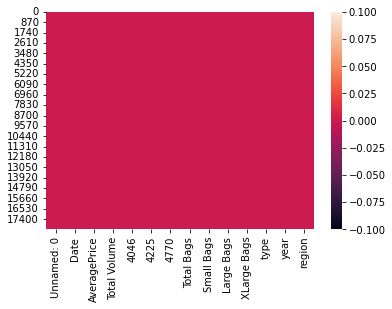

In [17]:
sns.heatmap(df.isnull())

###### There is no null values are present there in dataset

In [18]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'Total Unique Value for attribute {i} is\n\n {df[i].unique()}')
    print('\n')

Total Unique Value for attribute Total Volume is

 [ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]


Total Unique Value for attribute 4046 is

 [1036.74  674.28  794.7  ... 1191.92 1527.63 2894.77]


Total Unique Value for attribute 4225 is

 [ 54454.85  44638.81 109149.67 ...   2452.79   2981.04   2356.13]


Total Unique Value for attribute 4770 is

 [ 48.16  58.33 130.5  ... 727.94 727.01 224.53]


Total Unique Value for attribute Total Bags is

 [ 8696.87  9505.56  8145.35 ...  9394.11 10969.54 12014.15]


Total Unique Value for attribute Small Bags is

 [ 8603.62  9408.07  8042.21 ...  9351.8  10919.54 11988.14]


Total Unique Value for attribute Large Bags is

 [ 93.25  97.49 103.14 ... 324.8   42.31  26.01]


Total Unique Value for attribute XLarge Bags is

 [  0.    33.33 104.17 ... 228.27  12.12  24.18]


Total Unique Value for attribute type is

 ['conventional' 'organic']


Total Unique Value for attribute year is

 [2015 2016 2017 2018]


Total Unique Value

###### The above output's are showing us all the unique values that are present inside each columns.
1.Attribute type has only two unique values inside it

2.Attribute year has four unique values inside it and rest attributes are having more than 4 unique values inside it.

In [19]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'Total Value counts for attribute {i} is\n\n {df[i].value_counts()}')
    print('\n')

Total Value counts for attribute Date is

 2015-12-27    108
2017-12-24    108
2017-10-12    108
2017-03-12    108
2017-11-26    108
             ... 
2016-06-11    108
2018-07-01    108
2017-06-18    107
2017-06-25    107
2015-06-12    107
Name: Date, Length: 169, dtype: int64


Total Value counts for attribute AveragePrice is

 1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


Total Value counts for attribute Total Volume is

 4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


Total Value counts for attribute 4046 is

 0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Nam

###### The above output are representing the total count of all the unique values for each attributes.

###### Data Visualization

###### 1. Countplot

This is the Countplot diagram for--- type
AxesSubplot(0.125,0.125;0.775x0.755)


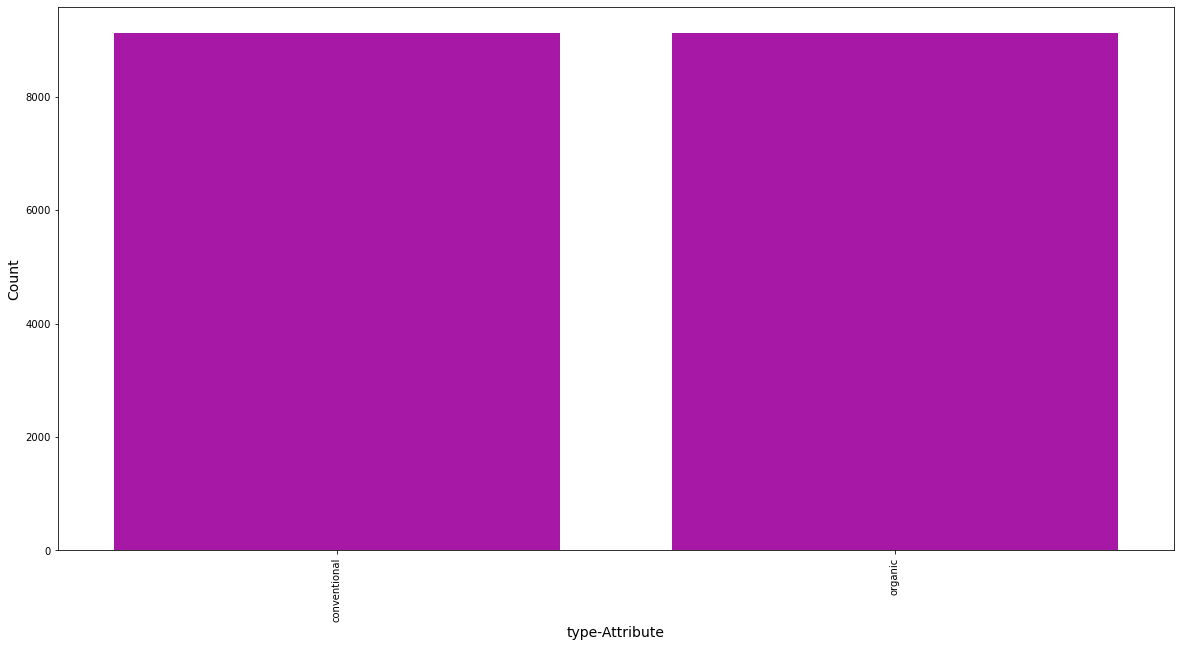



This is the Countplot diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


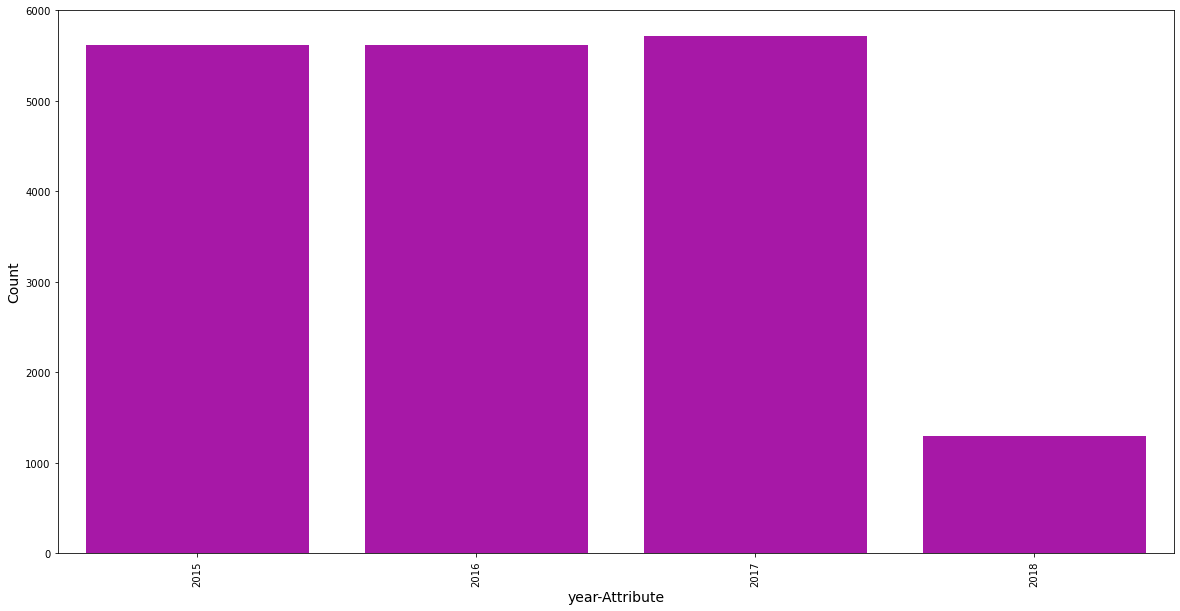



This is the Countplot diagram for--- region
AxesSubplot(0.125,0.125;0.775x0.755)


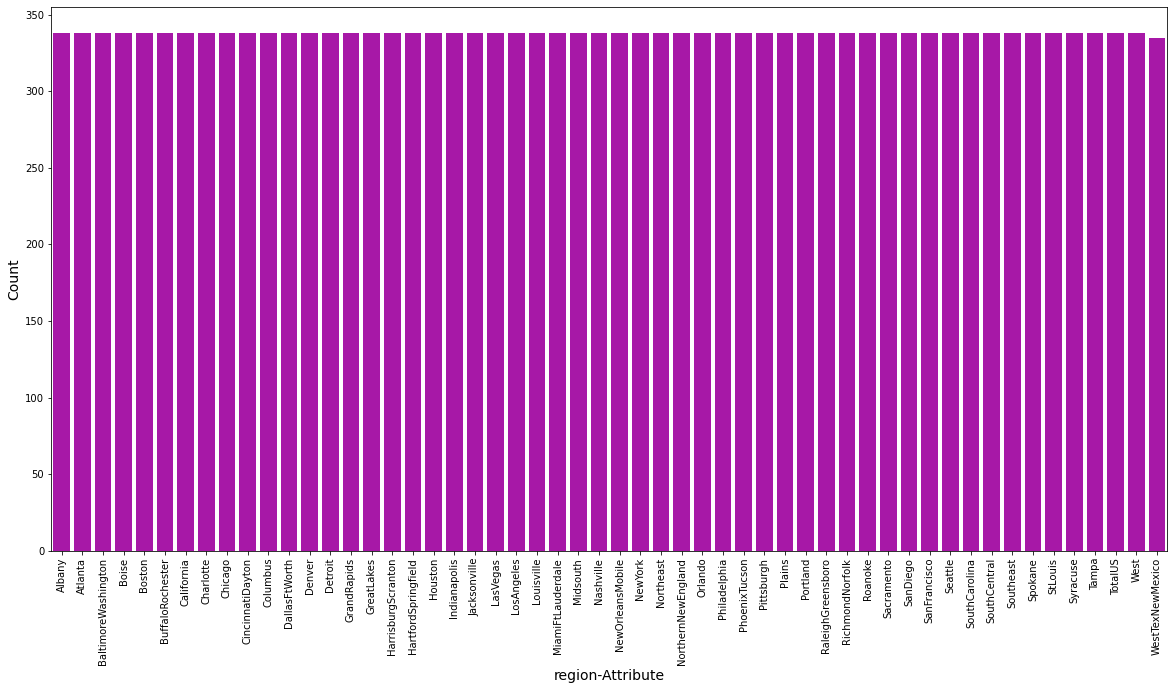

In [20]:
l=['type','year','region']
for i in l:
    plt.figure(figsize=(20,10))
    print(f'This is the Countplot diagram for--- {i}')
    print(sns.countplot(df[i],color='m'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### This plot basically do the comparision of their counts with respect to given attributes.
1.Attribute Type classes has equal distribution of data

2.Year 2017 has more data distributed as comapre to other years

3.Almost every regions are equally distribted in terms of numbers

###### 2. Histogram

This is the Histogram diagram for--- type
AxesSubplot(0.125,0.125;0.775x0.755)


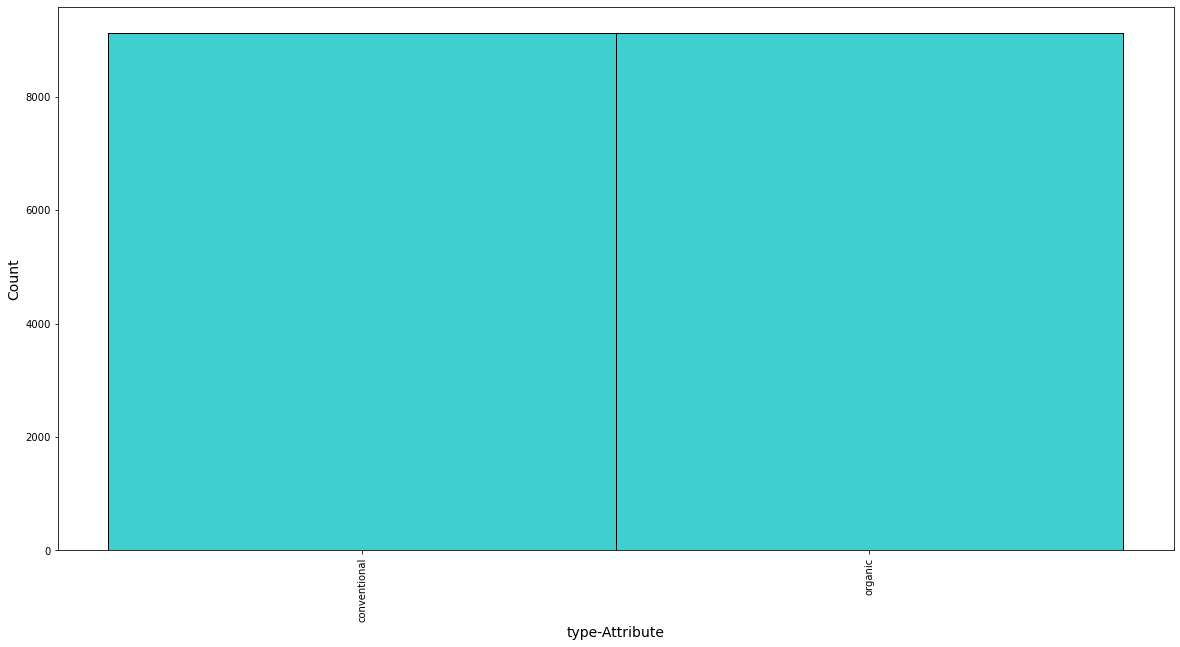



This is the Histogram diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


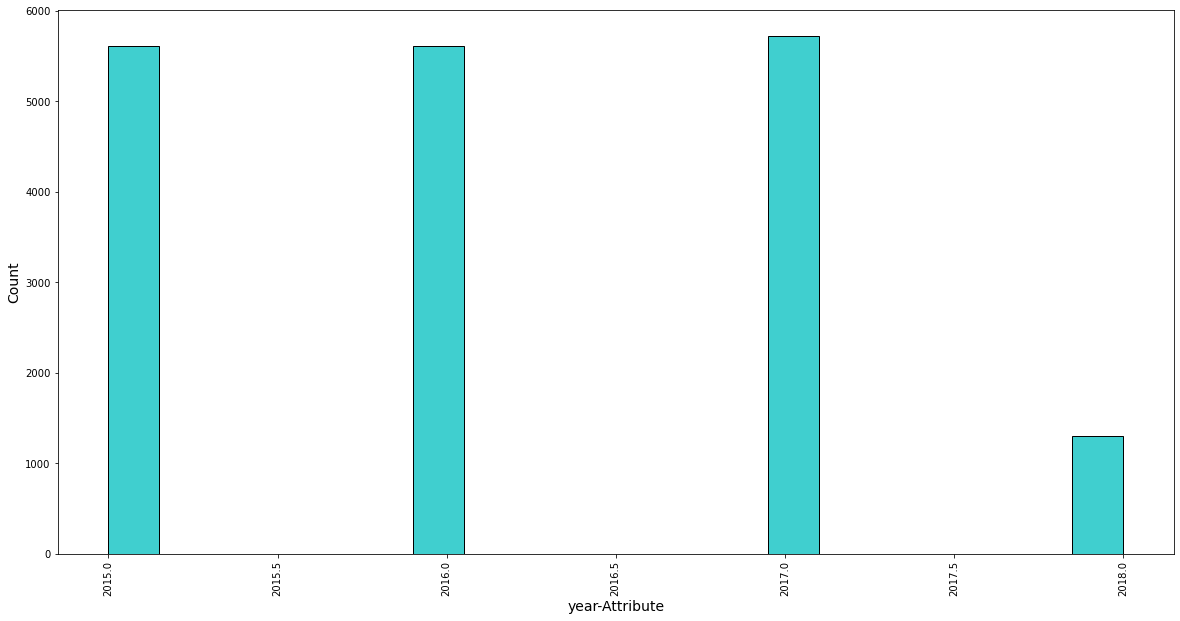



This is the Histogram diagram for--- region
AxesSubplot(0.125,0.125;0.775x0.755)


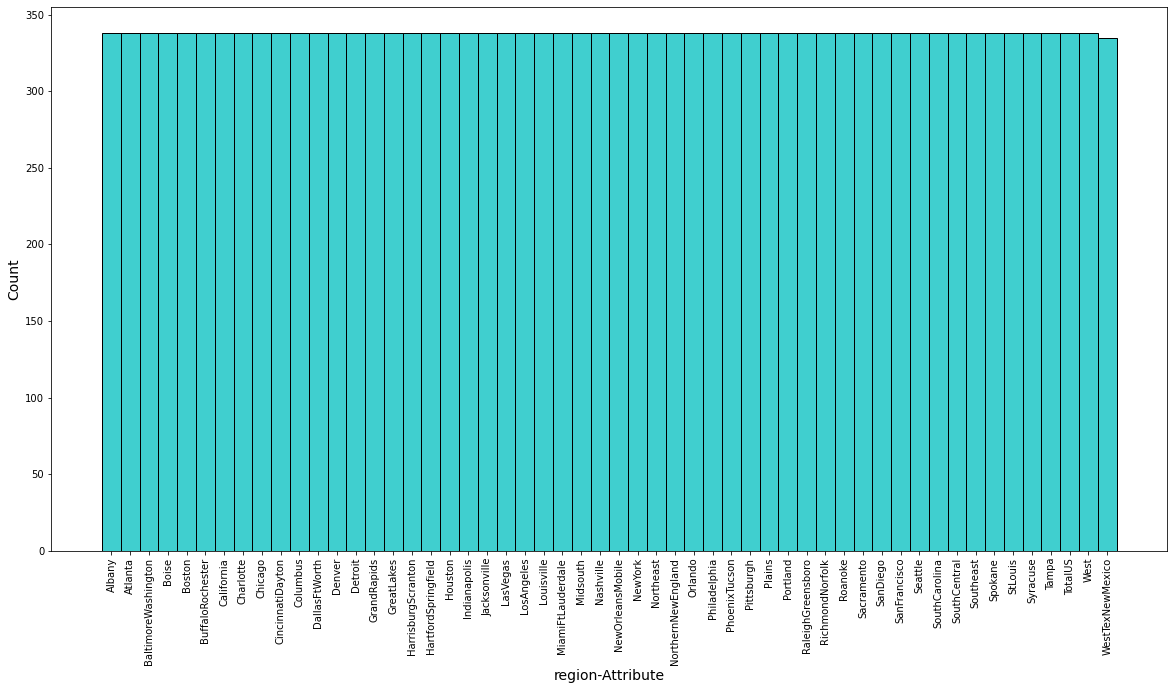

In [21]:
l=['type','year','region']
for i in l:
    plt.figure(figsize=(20,10))
    print(f'This is the Histogram diagram for--- {i}')
    print(sns.histplot(df[i],color='c'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.ylabel('Count',fontsize=14)    
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 3. Violinplot

This is the Violinplot diagram for--- AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


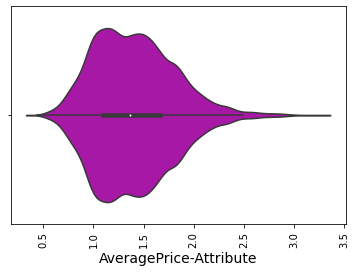



This is the Violinplot diagram for--- Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


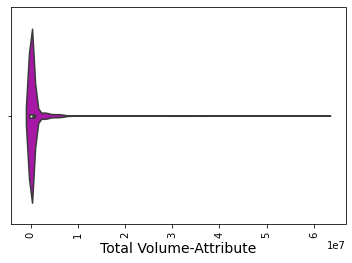



This is the Violinplot diagram for--- 4046
AxesSubplot(0.125,0.125;0.775x0.755)


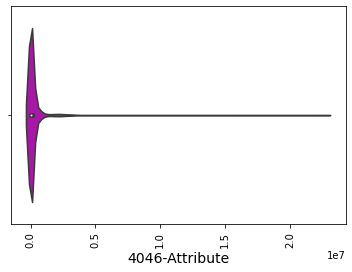



This is the Violinplot diagram for--- 4225
AxesSubplot(0.125,0.125;0.775x0.755)


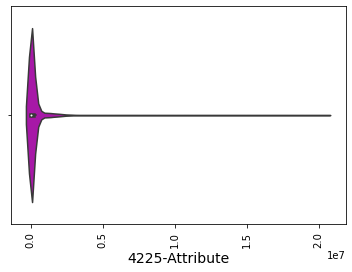



This is the Violinplot diagram for--- 4770
AxesSubplot(0.125,0.125;0.775x0.755)


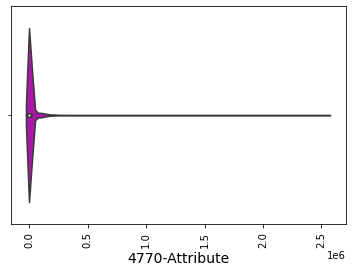



This is the Violinplot diagram for--- Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


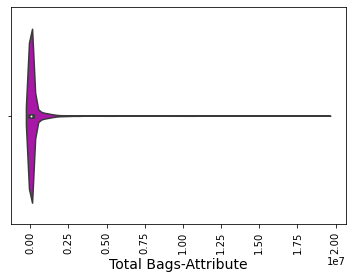



This is the Violinplot diagram for--- Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


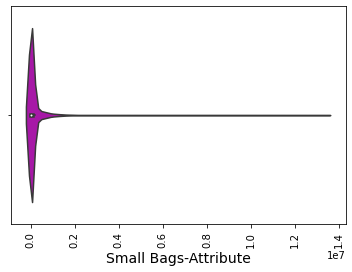



This is the Violinplot diagram for--- Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


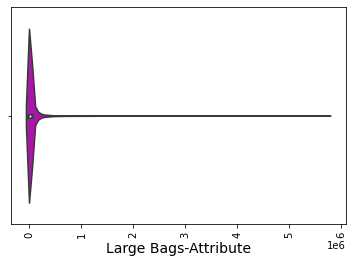



This is the Violinplot diagram for--- XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


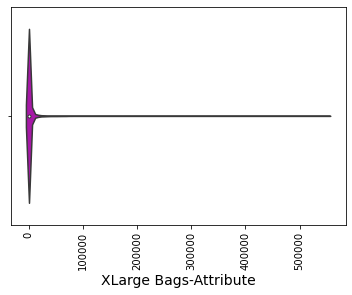



This is the Violinplot diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


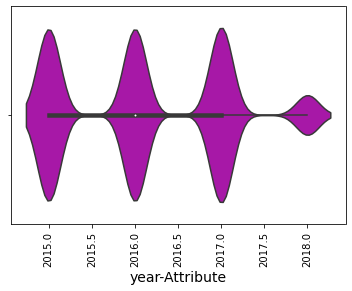

In [22]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is the Violinplot diagram for--- {i}')
    print(sns.violinplot(df[i],color='m'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 4. Lineplot

This is a Lineplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


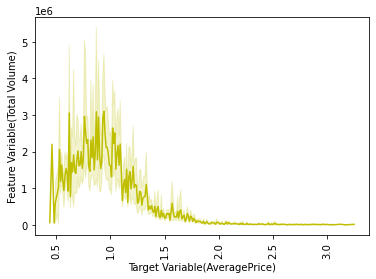



This is a Lineplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


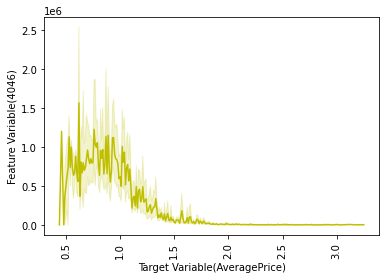



This is a Lineplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


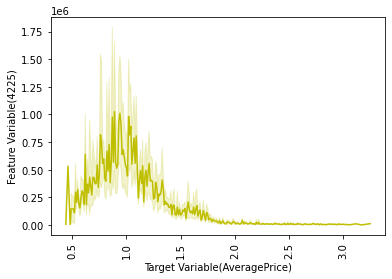



This is a Lineplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


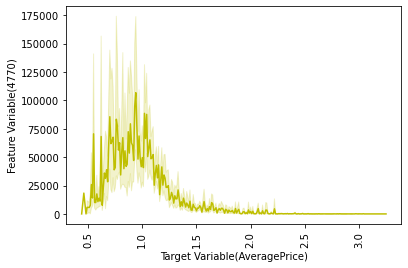



This is a Lineplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


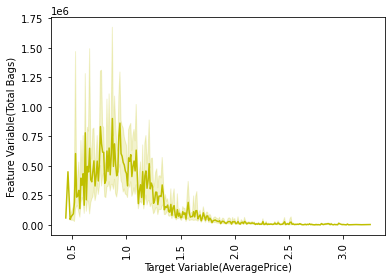



This is a Lineplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


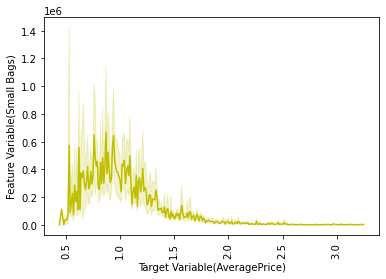



This is a Lineplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


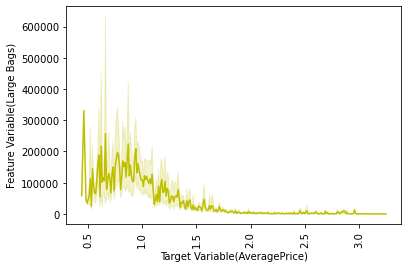



This is a Lineplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


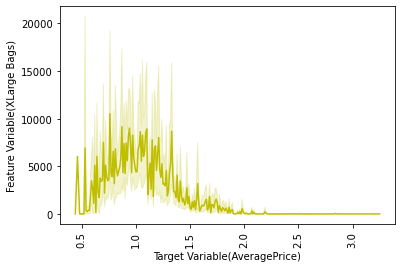



This is a Lineplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


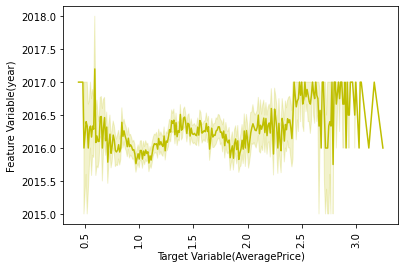

In [23]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Lineplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.lineplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 5. Relational Plot

This is a Relational diagram b/w attributes- AveragePrice & Total Volume


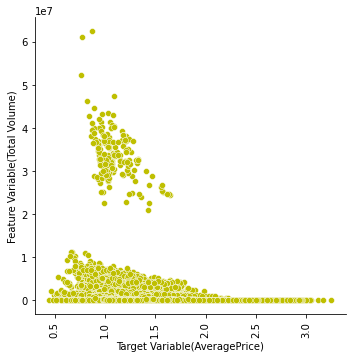



This is a Relational diagram b/w attributes- AveragePrice & 4046


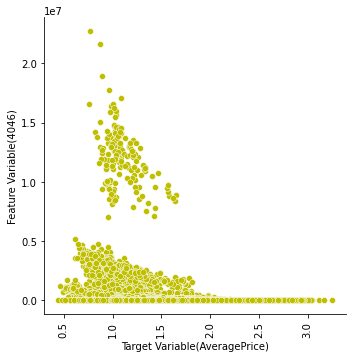



This is a Relational diagram b/w attributes- AveragePrice & 4225


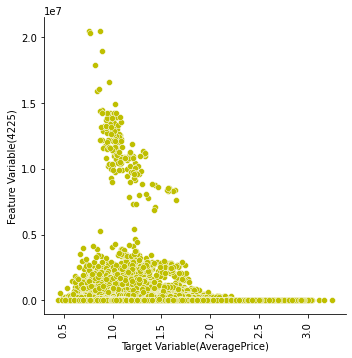



This is a Relational diagram b/w attributes- AveragePrice & 4770


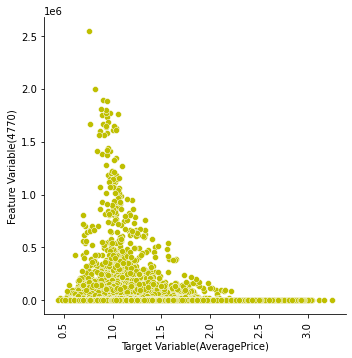



This is a Relational diagram b/w attributes- AveragePrice & Total Bags


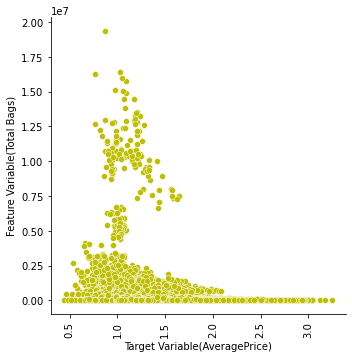



This is a Relational diagram b/w attributes- AveragePrice & Small Bags


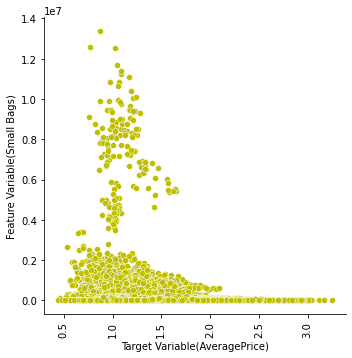



This is a Relational diagram b/w attributes- AveragePrice & Large Bags


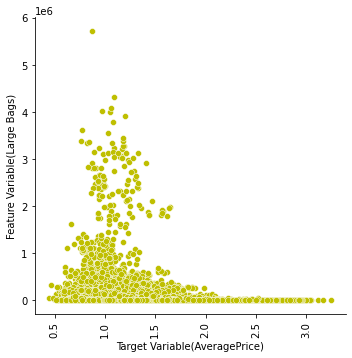



This is a Relational diagram b/w attributes- AveragePrice & XLarge Bags


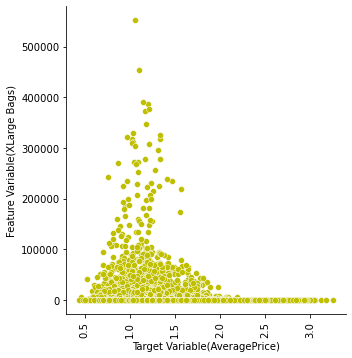



This is a Relational diagram b/w attributes- AveragePrice & year


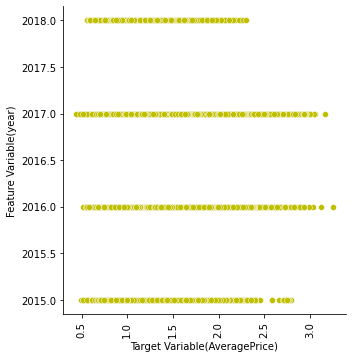

In [24]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Relational diagram b/w attributes- AveragePrice & {i}')
    print(sns.relplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 6. Scatterplot

This is a Scatterplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


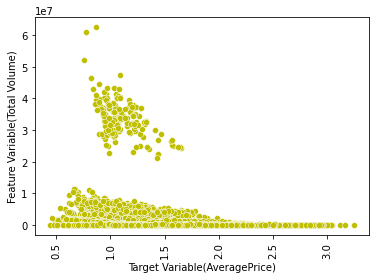



This is a Scatterplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


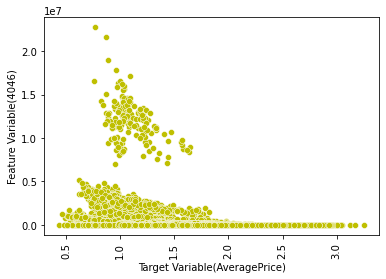



This is a Scatterplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


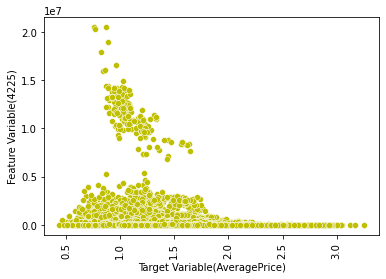



This is a Scatterplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


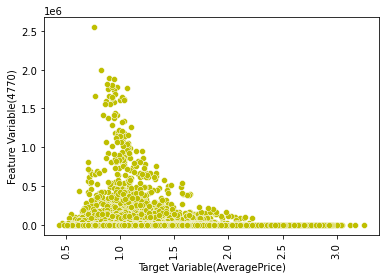



This is a Scatterplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


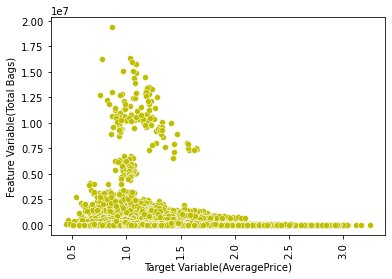



This is a Scatterplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


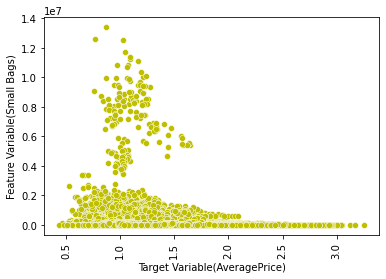



This is a Scatterplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


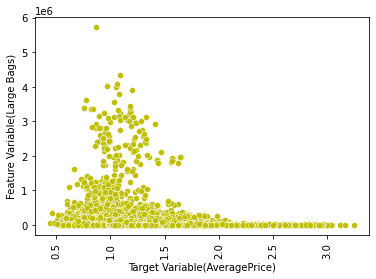



This is a Scatterplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


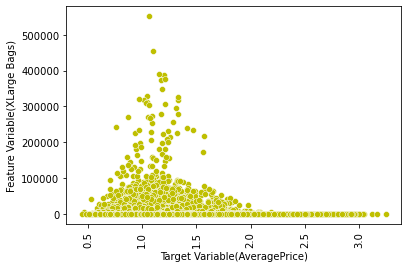



This is a Scatterplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


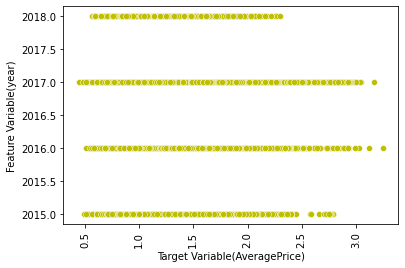

In [25]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Scatterplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.scatterplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

###### 7. Stripplot

This is a Stripplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


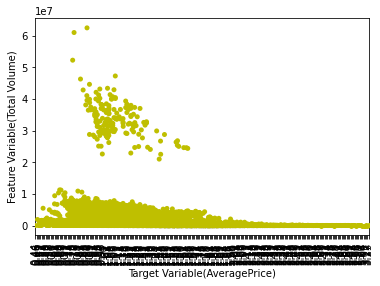



This is a Stripplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


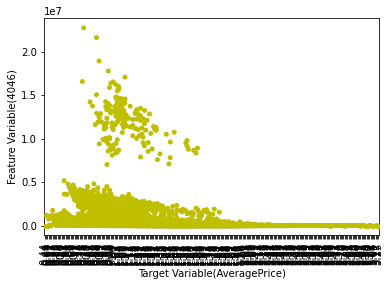



This is a Stripplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


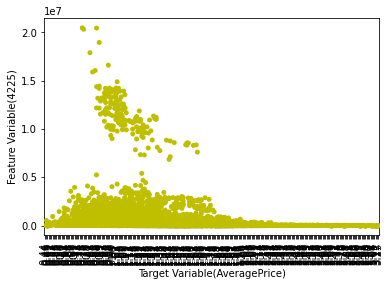



This is a Stripplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


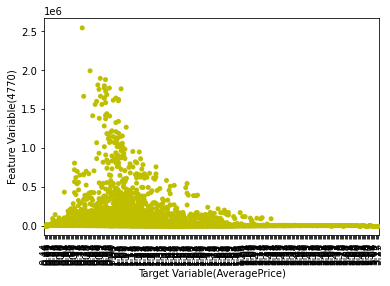



This is a Stripplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


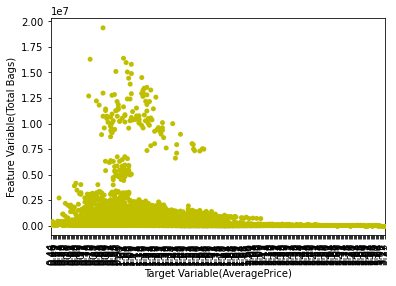



This is a Stripplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


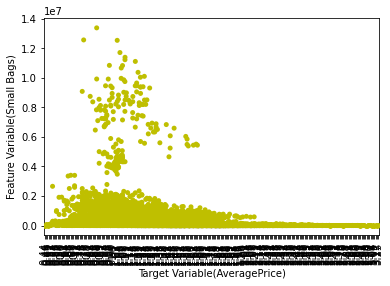



This is a Stripplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


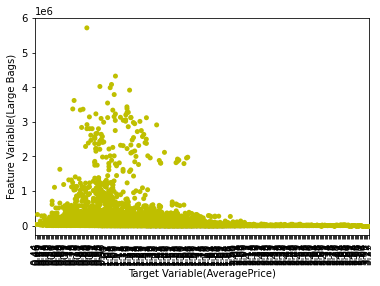



This is a Stripplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


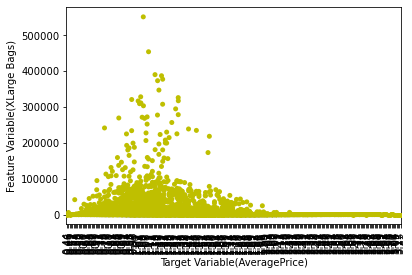



This is a Stripplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


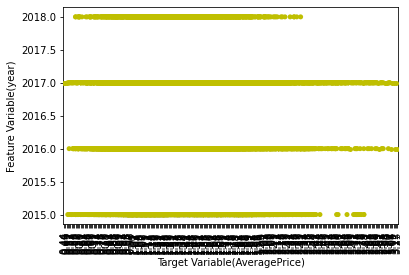

In [26]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Stripplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.stripplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### 8.Categorical Plot
Categorical Columns = Type,Region

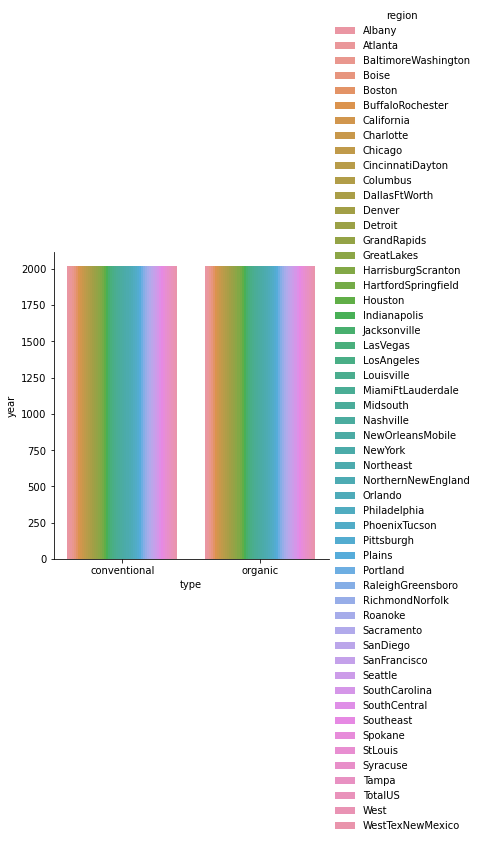

In [27]:
sns.catplot(x='type',y='year',hue='region',kind='bar',data=df)

[Text(0, 0, 'Albany'),
 Text(1, 0, 'Atlanta'),
 Text(2, 0, 'BaltimoreWashington'),
 Text(3, 0, 'Boise'),
 Text(4, 0, 'Boston'),
 Text(5, 0, 'BuffaloRochester'),
 Text(6, 0, 'California'),
 Text(7, 0, 'Charlotte'),
 Text(8, 0, 'Chicago'),
 Text(9, 0, 'CincinnatiDayton'),
 Text(10, 0, 'Columbus'),
 Text(11, 0, 'DallasFtWorth'),
 Text(12, 0, 'Denver'),
 Text(13, 0, 'Detroit'),
 Text(14, 0, 'GrandRapids'),
 Text(15, 0, 'GreatLakes'),
 Text(16, 0, 'HarrisburgScranton'),
 Text(17, 0, 'HartfordSpringfield'),
 Text(18, 0, 'Houston'),
 Text(19, 0, 'Indianapolis'),
 Text(20, 0, 'Jacksonville'),
 Text(21, 0, 'LasVegas'),
 Text(22, 0, 'LosAngeles'),
 Text(23, 0, 'Louisville'),
 Text(24, 0, 'MiamiFtLauderdale'),
 Text(25, 0, 'Midsouth'),
 Text(26, 0, 'Nashville'),
 Text(27, 0, 'NewOrleansMobile'),
 Text(28, 0, 'NewYork'),
 Text(29, 0, 'Northeast'),
 Text(30, 0, 'NorthernNewEngland'),
 Text(31, 0, 'Orlando'),
 Text(32, 0, 'Philadelphia'),
 Text(33, 0, 'PhoenixTucson'),
 Text(34, 0, 'Pittsburgh'),
 T

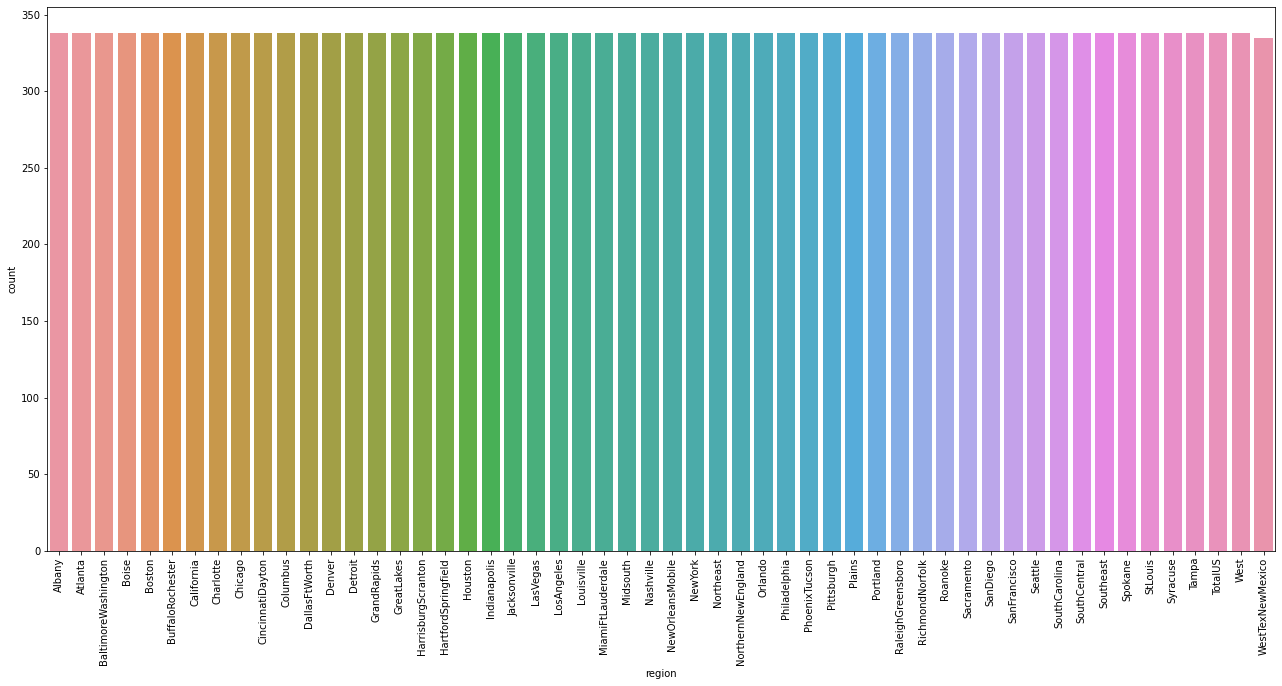

In [28]:
# count plot on single categorical variable
plt.figure(figsize=(22,10))
count1=sns.countplot(df['region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)

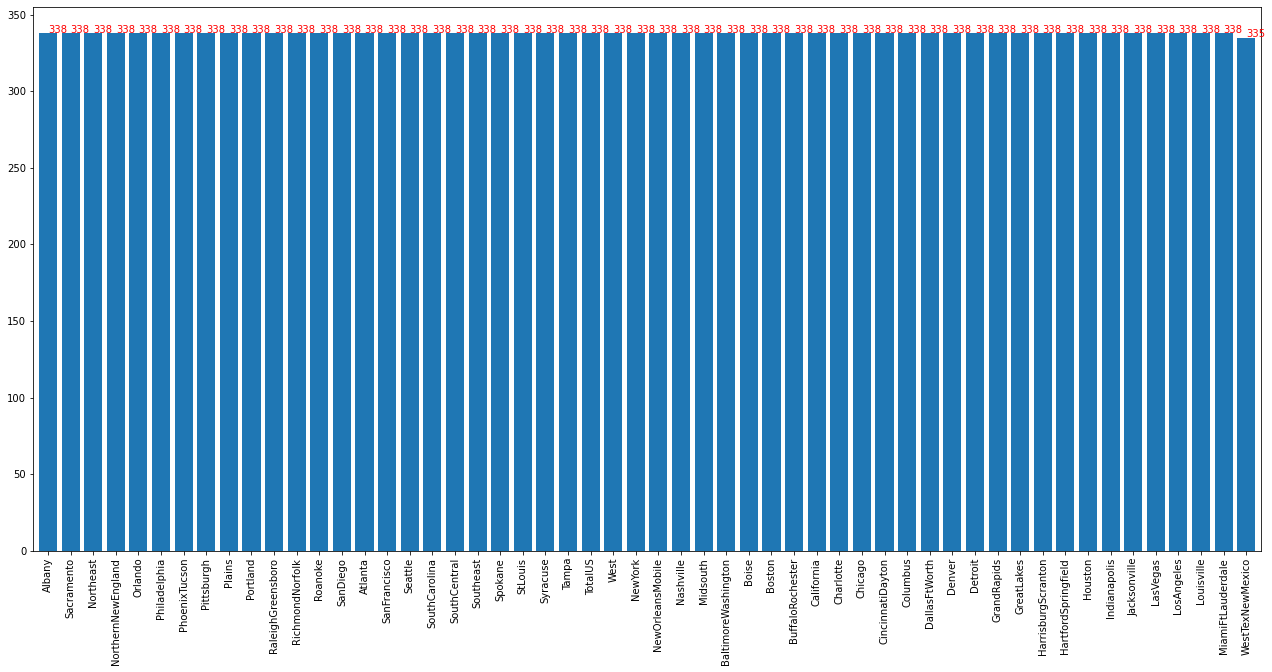

In [29]:
plt.figure(figsize=(22,10))
s = df['region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.region + 0.2 , v.region, color='red')
plt.show()

##### Below is the diagram of Scatterplot,Lineplot and stripplot when x-axis= Region and y-axis are containing all other variables other than Region

This is a Scatterplot diagram b/w attributes- region & AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


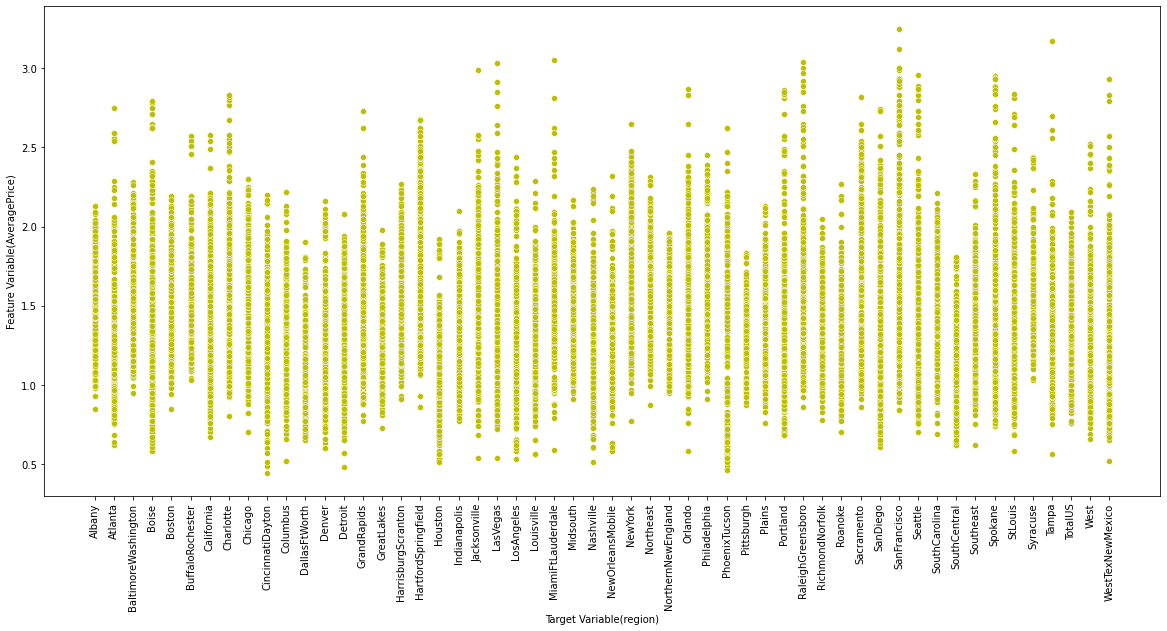



This is a Scatterplot diagram b/w attributes- region & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


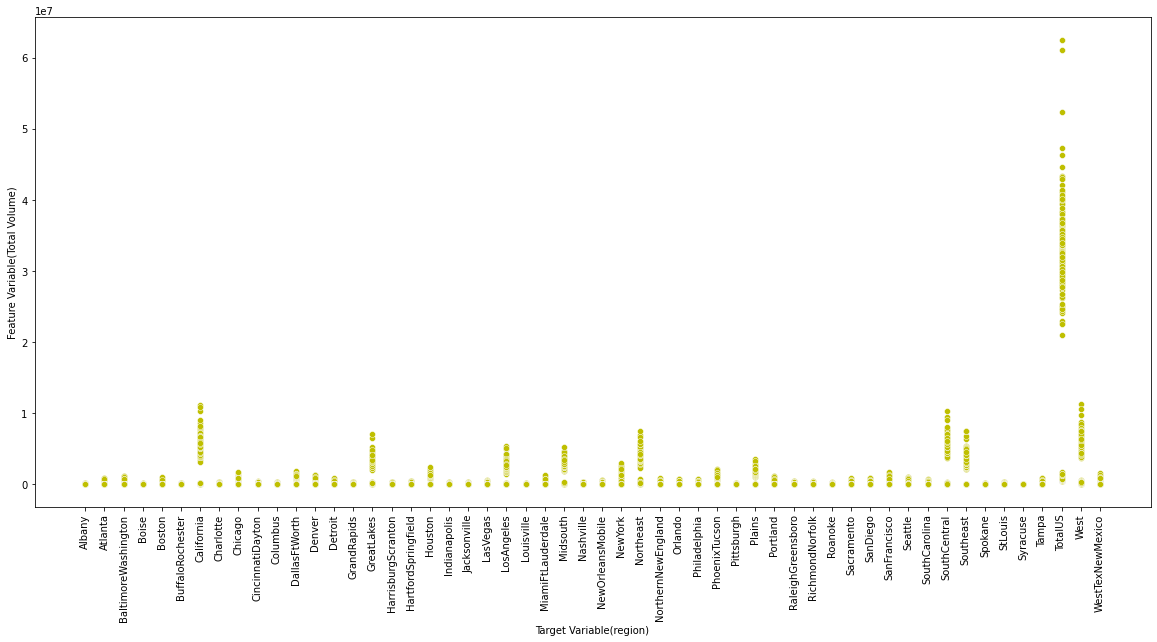



This is a Scatterplot diagram b/w attributes- region & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


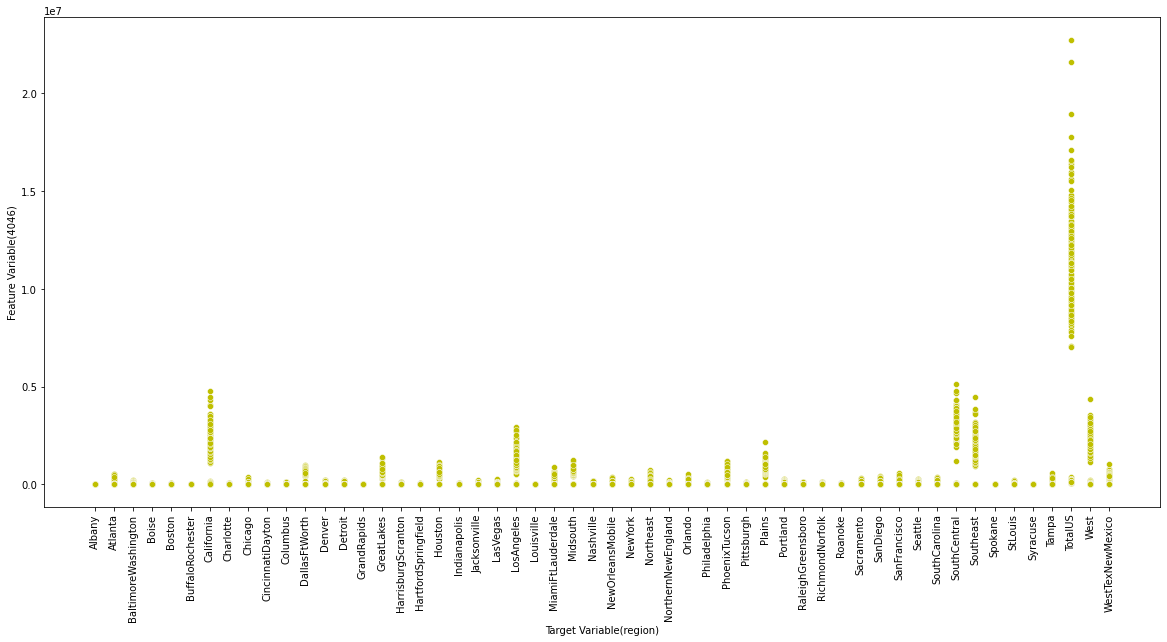



This is a Scatterplot diagram b/w attributes- region & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


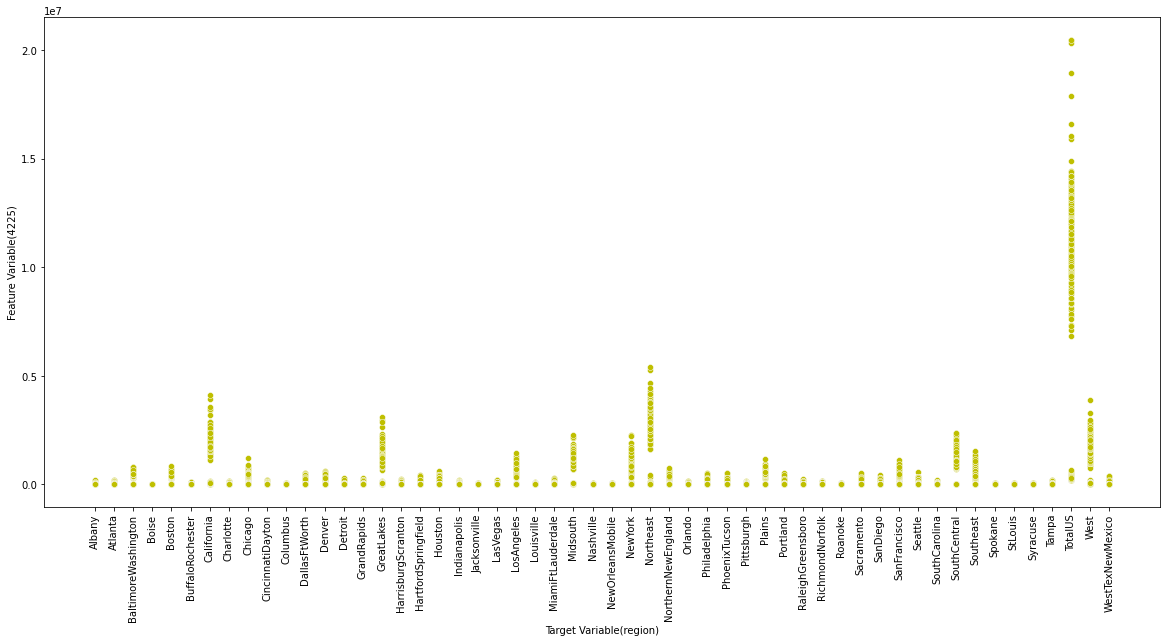



This is a Scatterplot diagram b/w attributes- region & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


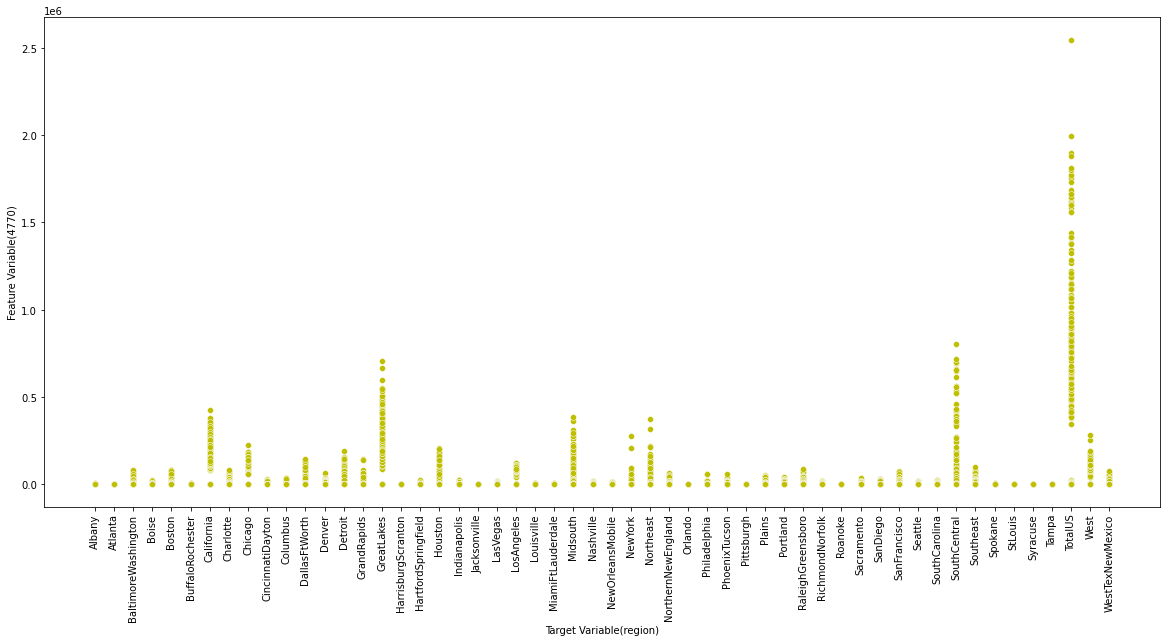



This is a Scatterplot diagram b/w attributes- region & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


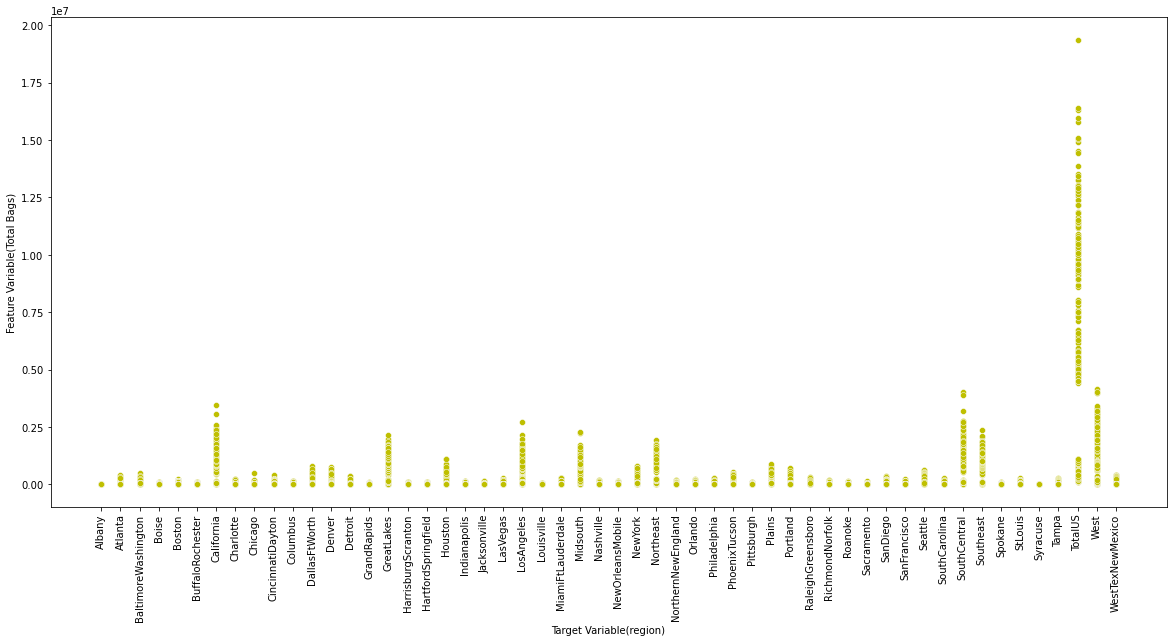



This is a Scatterplot diagram b/w attributes- region & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


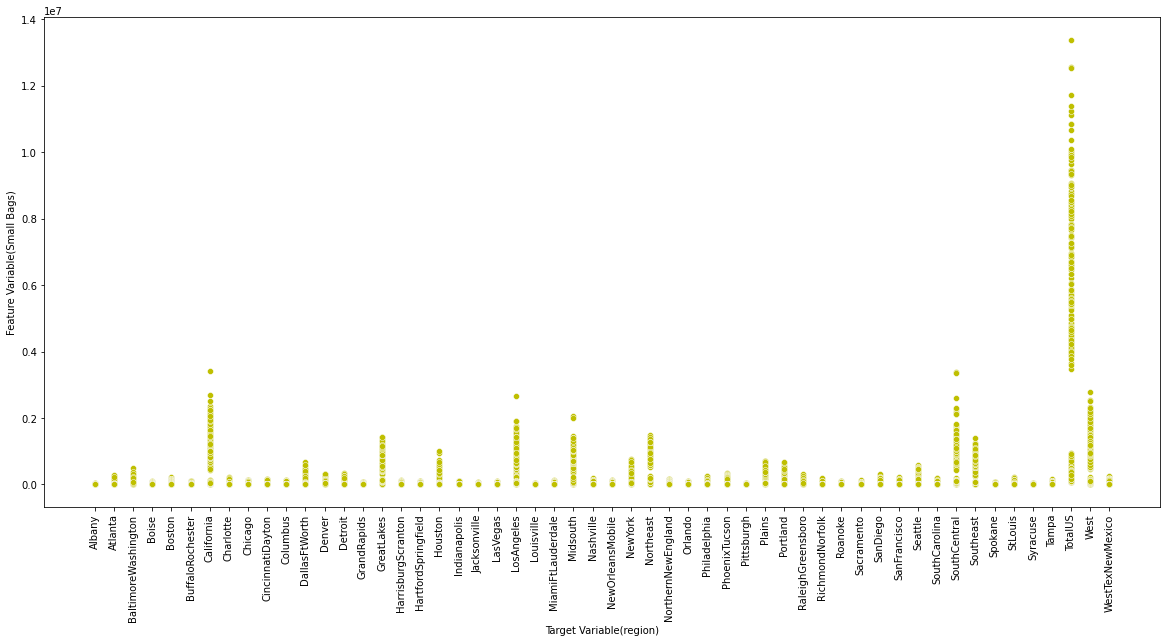



This is a Scatterplot diagram b/w attributes- region & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


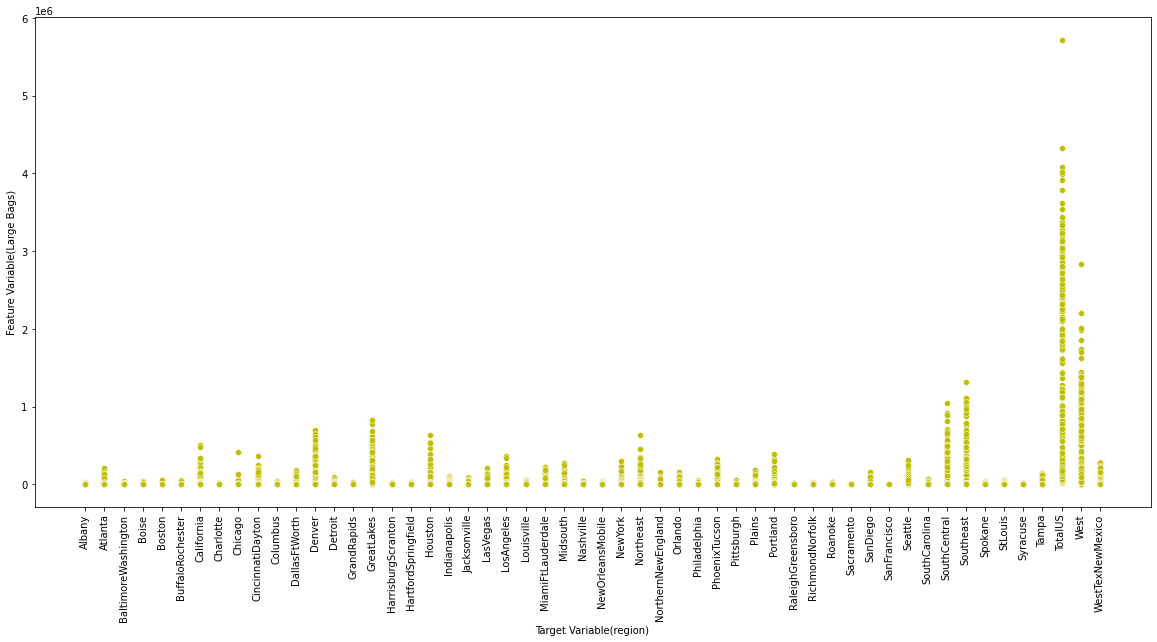



This is a Scatterplot diagram b/w attributes- region & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


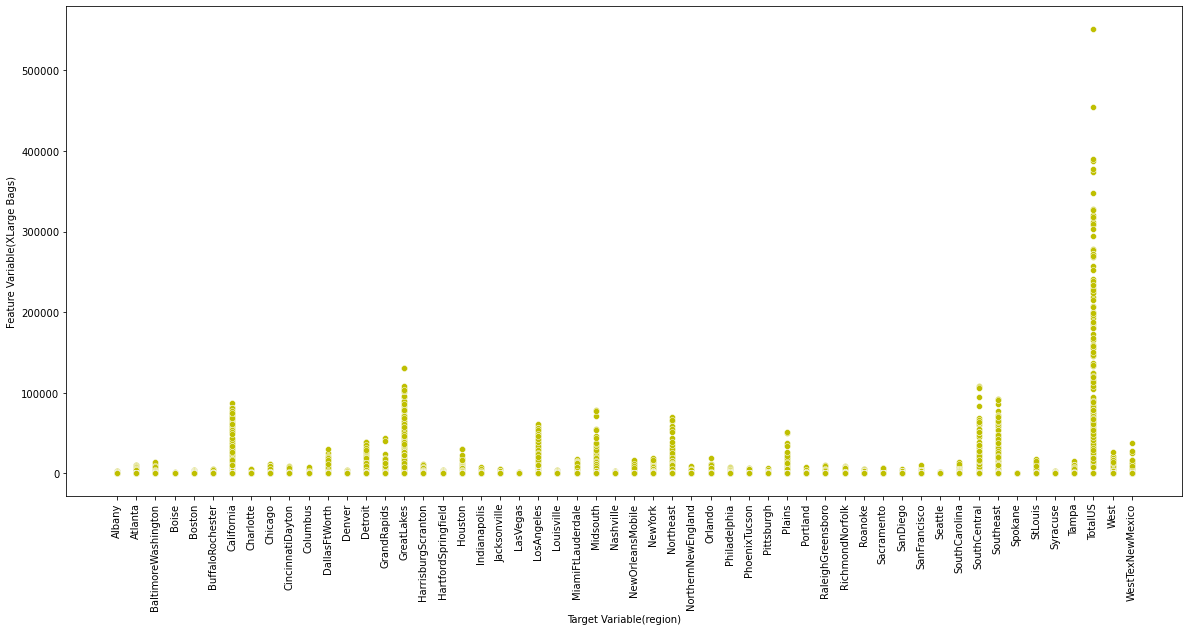



This is a Scatterplot diagram b/w attributes- region & type
AxesSubplot(0.125,0.125;0.775x0.755)


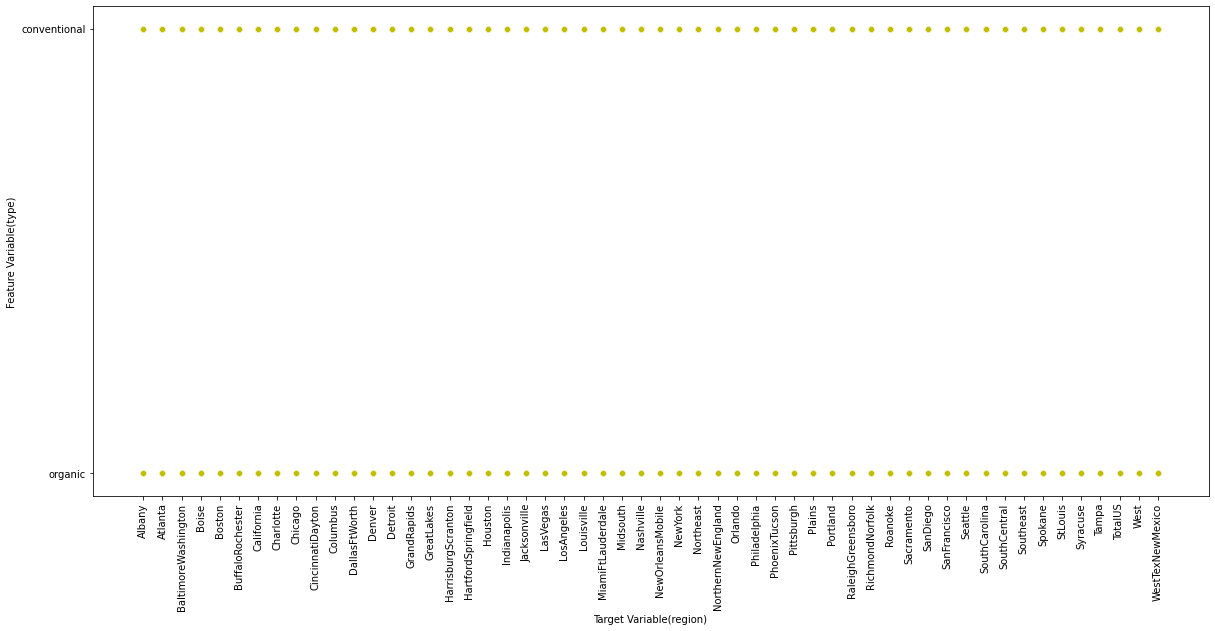



This is a Scatterplot diagram b/w attributes- region & year
AxesSubplot(0.125,0.125;0.775x0.755)


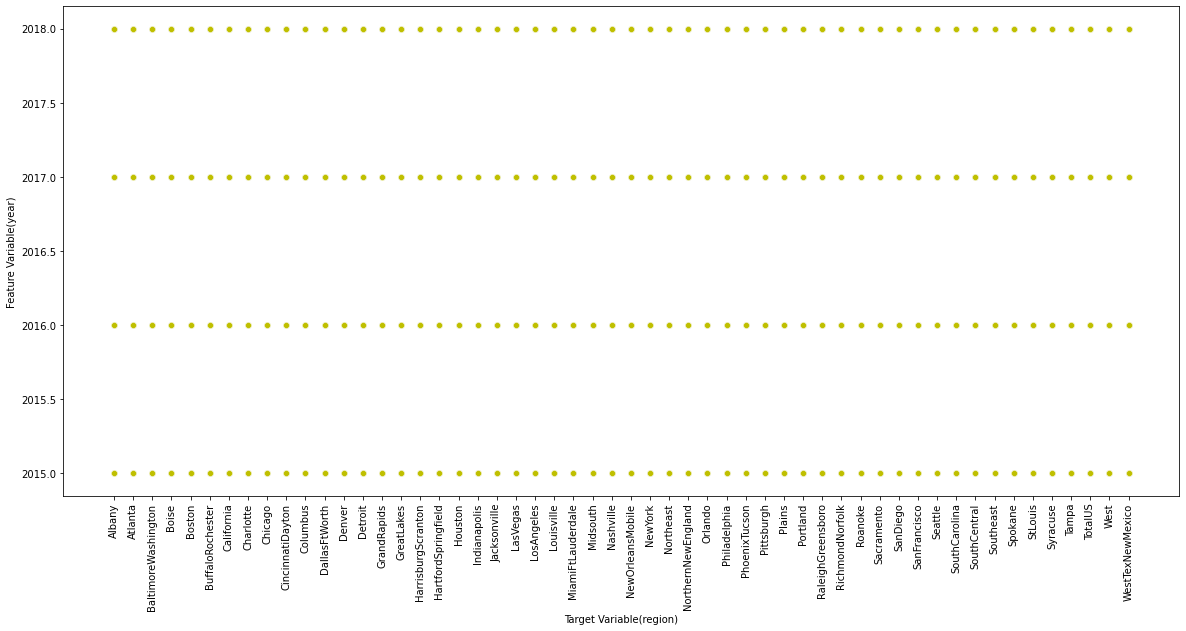

In [30]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year']
for i in l:
    plt.figure(figsize=(20,9))
    print(f'This is a Scatterplot diagram b/w attributes- region & {i}')
    print(sns.scatterplot(x=df.region,y=df[i],color='y'))
    plt.xlabel('Target Variable(region)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

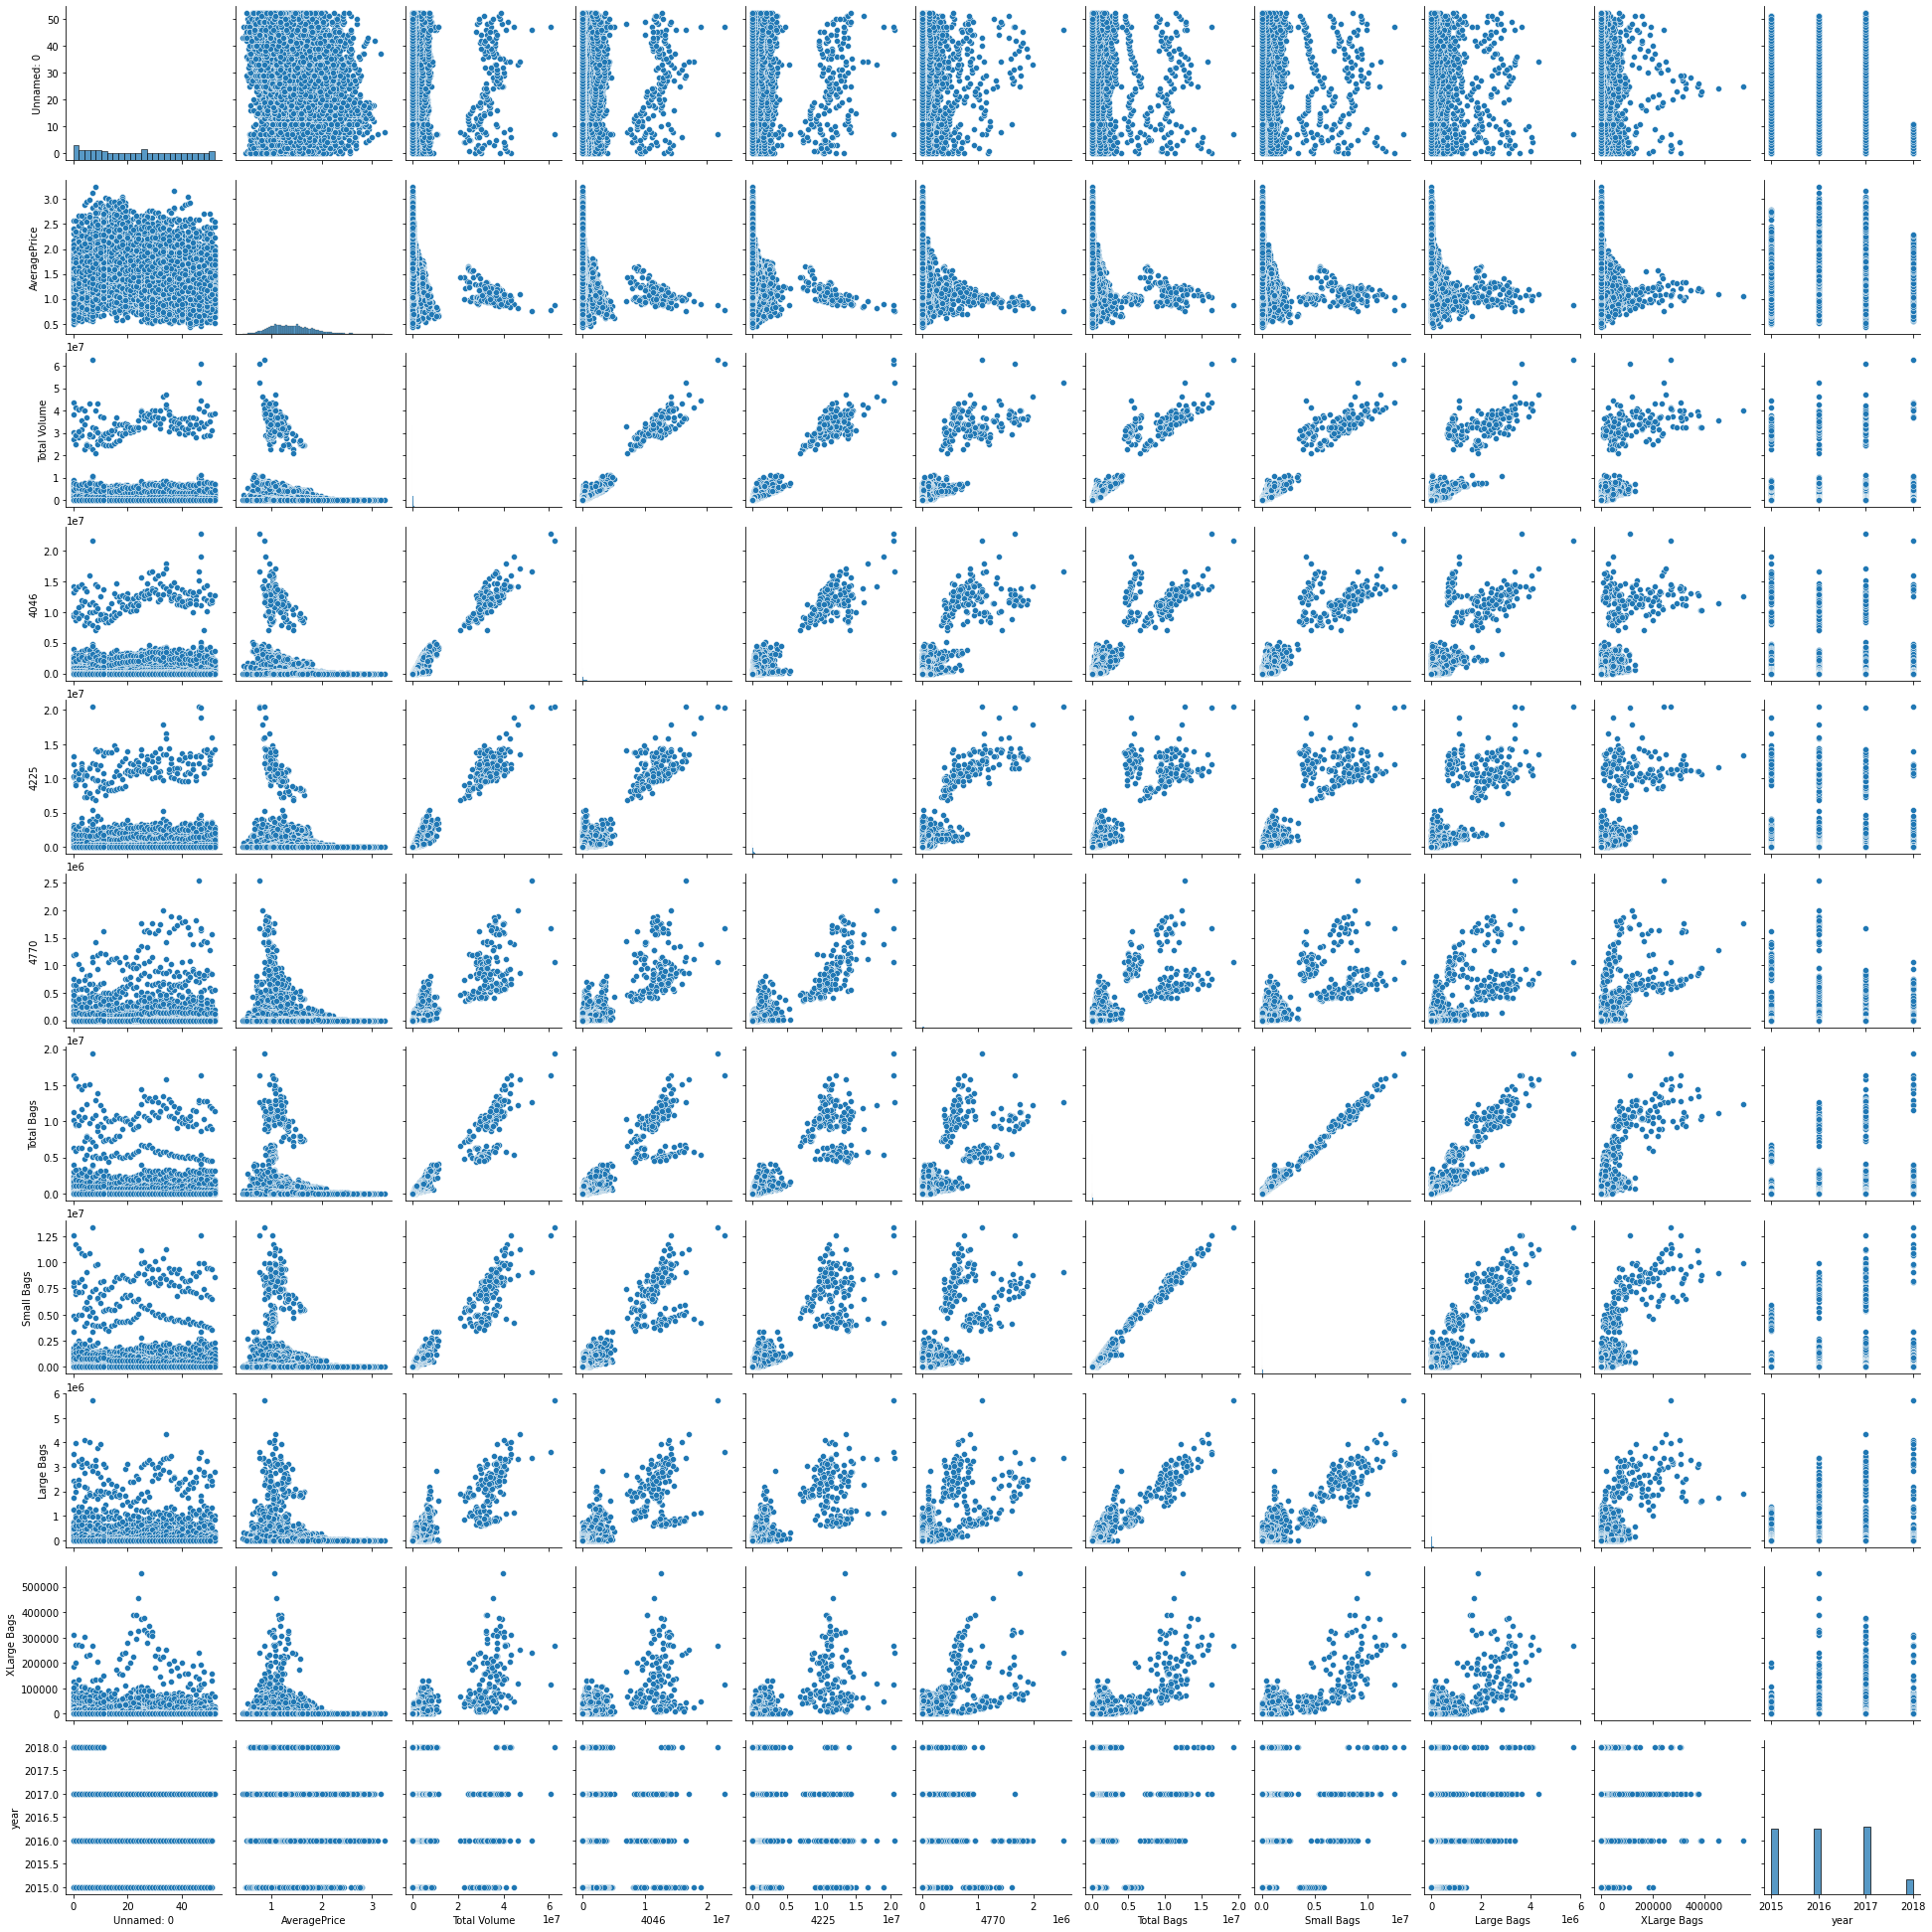

In [31]:
sns.pairplot(df)

###### Encoding

Label Encoder

In [32]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [33]:
#l is the list of all the categorical columns
l=['Date','type','region']
for i in l:
    df[i]=LabelEncoder().fit_transform(df[i].astype(str))
    
df

Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225  \
0               0    51          1.33      64236.62  1036.74   54454.85   
1               1    50          1.35      54876.98   674.28   44638.81   
2               2    49          0.93     118220.22   794.70  109149.67   
3               3    22          1.08      78992.15  1132.00   71976.41   
4               4    46          1.28      51039.60   941.48   43838.39   
...           ...   ...           ...           ...      ...        ...   
18244           7   164          1.63      17074.83  2046.96    1529.20   
18245           8   159          1.71      13888.04  1191.70    3431.50   
18246           9   158          1.87      13766.76  1191.92    2452.79   
18247          10   157          1.93      16205.22  1527.63    2981.04   
18248          11   166          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  \
0       48.16     8696.87     8603.62       93.25          0.0     0  2015   
1       58.33     9505.56     9408.07       97.49          0.0     0  2015   
2      130.50     8145.35     8042.21      103.14          0.0     0  2015   
3       72.58     5811.16     5677.40      133.76          0.0     0  2015   
4       75.78     6183.95     5986.26      197.69          0.0     0  2015   
...       ...         ...         ...         ...          ...   ...   ...   
18244    0.00    13498.67    13066.82      431.85          0.0     1  2018   
18245    0.00     9264.84     8940.04      324.80          0.0     1  2018   
18246  727.94     9394.11     9351.80       42.31          0.0     1  2018   
18247  727.01    10969.54    10919.54       50.00          0.0     1  2018   
18248  224.53    12014.15    11988.14       26.01          0.0     1  2018   

       region  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
18244      53  
18245      53  
18246      53  
18247      53  
18248      53  

[18249 rows x 14 columns]

###### All zeroes will be replace by Mean

In [34]:
#replaced all 0 values of each column to their respective mean
l=['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in l:
    a=df[i].mean()
    df[i]=df[i].replace(0,a)
    
df

Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225  \
0               0    51          1.33      64236.62  1036.74   54454.85   
1               1    50          1.35      54876.98   674.28   44638.81   
2               2    49          0.93     118220.22   794.70  109149.67   
3               3    22          1.08      78992.15  1132.00   71976.41   
4               4    46          1.28      51039.60   941.48   43838.39   
...           ...   ...           ...           ...      ...        ...   
18244           7   164          1.63      17074.83  2046.96    1529.20   
18245           8   159          1.71      13888.04  1191.70    3431.50   
18246           9   158          1.87      13766.76  1191.92    2452.79   
18247          10   157          1.93      16205.22  1527.63    2981.04   
18248          11   166          1.62      17489.58  2894.77    2356.13   

               4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
0         48.160000     8696.87     8603.62       93.25  3106.426507     0   
1         58.330000     9505.56     9408.07       97.49  3106.426507     0   
2        130.500000     8145.35     8042.21      103.14  3106.426507     0   
3         72.580000     5811.16     5677.40      133.76  3106.426507     0   
4         75.780000     6183.95     5986.26      197.69  3106.426507     0   
...             ...         ...         ...         ...          ...   ...   
18244  22839.735993    13498.67    13066.82      431.85  3106.426507     1   
18245  22839.735993     9264.84     8940.04      324.80  3106.426507     1   
18246    727.940000     9394.11     9351.80       42.31  3106.426507     1   
18247    727.010000    10969.54    10919.54       50.00  3106.426507     1   
18248    224.530000    12014.15    11988.14       26.01  3106.426507     1   

       year  region  
0      2015       0  
1      2015       0  
2      2015       0  
3      2015       0  
4      2015       0  
...     ...     ...  
18244  2018      53  
18245  2018      53  
18246  2018      53  
18247  2018      53  
18248  2018      53  

[18249 rows x 14 columns]

###### Descriptive Statistics

In [36]:
df.describe()

Unnamed: 0          Date  AveragePrice  Total Volume          4046  \
count  18249.000000  18249.000000  18249.000000  1.824900e+04  1.824900e+04   
mean      24.232232     83.998520      1.405978  8.506440e+05  2.968940e+05   
std       15.481045     48.786207      0.402677  3.453545e+06  1.264533e+06   
min        0.000000      0.000000      0.440000  8.456000e+01  1.000000e+00   
25%       10.000000     42.000000      1.100000  1.083858e+04  9.750900e+02   
50%       24.000000     84.000000      1.370000  1.073768e+05  9.954770e+03   
75%       38.000000    126.000000      1.660000  4.329623e+05  1.217699e+05   
max       52.000000    168.000000      3.250000  6.250565e+07  2.274362e+07   

               4225          4770    Total Bags    Small Bags    Large Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean   2.961412e+05  2.971957e+04  2.398362e+05  1.837821e+05  6.139498e+04   
std    1.203999e+06  1.065084e+05  9.862184e+05  7.459830e+05  2.430763e+05   
min    1.260000e+00  8.300000e-01  3.090000e+00  2.520000e+00  9.700000e-01   
25%    3.086950e+03  3.786500e+02  5.108010e+03  3.125050e+03  9.187500e+02   
50%    2.977364e+04  1.111933e+04  3.992521e+04  2.787623e+04  7.942080e+03   
75%    1.542584e+05  2.283974e+04  1.112384e+05  8.620928e+04  5.433809e+04   
max    2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

         XLarge Bags          type          year        region  
count   18249.000000  18249.000000  18249.000000  18249.000000  
mean     5157.291024      0.499918   2016.147899     26.495644  
std     17391.406970      0.500014      0.939938     15.583788  
min         1.000000      0.000000   2015.000000      0.000000  
25%      3106.426507      0.000000   2015.000000     13.000000  
50%      3106.426507      0.000000   2016.000000     26.000000  
75%      3106.426507      1.000000   2017.000000     40.000000  
max    551693.650000      1.000000   2018.000000     53.000000

In [37]:
df.describe().T

count           mean           std      min           25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.000000   
Date          18249.0      83.998520  4.878621e+01     0.00     42.000000   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.100000   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.580000   
4046          18249.0  296894.009425  1.264533e+06     1.00    975.090000   
4225          18249.0  296141.166453  1.203999e+06     1.26   3086.950000   
4770          18249.0   29719.566600  1.065084e+05     0.83    378.650000   
Total Bags    18249.0  239836.176581  9.862184e+05     3.09   5108.010000   
Small Bags    18249.0  183782.113688  7.459830e+05     2.52   3125.050000   
Large Bags    18249.0   61394.982709  2.430763e+05     0.97    918.750000   
XLarge Bags   18249.0    5157.291024  1.739141e+04     1.00   3106.426507   
type          18249.0       0.499918  5.000137e-01     0.00      0.000000   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.000000   
region        18249.0      26.495644  1.558379e+01     0.00     13.000000   

                        50%            75%          max  
Unnamed: 0        24.000000      38.000000        52.00  
Date              84.000000     126.000000       168.00  
AveragePrice       1.370000       1.660000         3.25  
Total Volume  107376.760000  432962.290000  62505646.52  
4046            9954.770000  121769.890000  22743616.17  
4225           29773.640000  154258.390000  20470572.61  
4770           11119.330000   22839.735993   2546439.11  
Total Bags     39925.210000  111238.440000  19373134.37  
Small Bags     27876.230000   86209.280000  13384586.80  
Large Bags      7942.080000   54338.088145   5719096.61  
XLarge Bags     3106.426507    3106.426507    551693.65  
type               0.000000       1.000000         1.00  
year            2016.000000    2017.000000      2018.00  
region            26.000000      40.000000        53.00

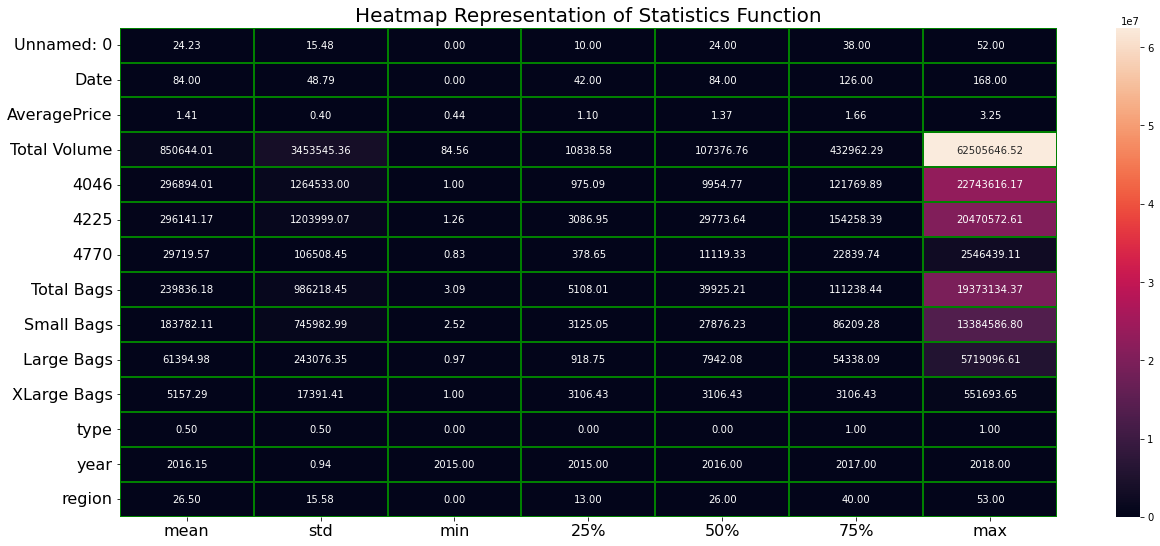

In [38]:
plt.figure(figsize=(21,9))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='green',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=0,fontsize=16)
plt.xticks(rotation=0,fontsize=16)
plt.title('Heatmap Representation of Statistics Function',fontsize=20)
plt.show()

##### Correlation

In [39]:
df.corr()

Unnamed: 0      Date  AveragePrice  Total Volume      4046  \
Unnamed: 0      1.000000 -0.313720     -0.133008      0.014035  0.018174   
Date           -0.313720  1.000000      0.121166      0.011384 -0.002099   
AveragePrice   -0.133008  0.121166      1.000000     -0.192752 -0.206687   
Total Volume    0.014035  0.011384     -0.192752      1.000000  0.977463   
4046            0.018174 -0.002099     -0.206687      0.977463  1.000000   
4225            0.019878 -0.015150     -0.172693      0.974078  0.925593   
4770            0.040187 -0.044192     -0.146752      0.864455  0.826171   
Total Bags     -0.002174  0.065723     -0.176847      0.963022  0.919631   
Small Bags      0.000780  0.056579     -0.173151      0.966977  0.924627   
Large Bags     -0.005355  0.067909     -0.154010      0.877119  0.835021   
XLarge Bags    -0.006212  0.065890     -0.084869      0.736038  0.688072   
type           -0.000288 -0.000030      0.615845     -0.232434 -0.222827   
year           -0.171667  0.950267      0.093197      0.017193  0.003574   
region         -0.000489 -0.000052     -0.011716      0.174176  0.192410   

                  4225      4770  Total Bags  Small Bags  Large Bags  \
Unnamed: 0    0.019878  0.040187   -0.002174    0.000780   -0.005355   
Date         -0.015150 -0.044192    0.065723    0.056579    0.067909   
AveragePrice -0.172693 -0.146752   -0.176847   -0.173151   -0.154010   
Total Volume  0.974078  0.864455    0.963022    0.966977    0.877119   
4046          0.925593  0.826171    0.919631    0.924627    0.835021   
4225          1.000000  0.880332    0.905656    0.915659    0.806358   
4770          0.880332  1.000000    0.784314    0.794642    0.689588   
Total Bags    0.905656  0.784314    1.000000    0.994105    0.939750   
Small Bags    0.915659  0.794642    0.994105    1.000000    0.898993   
Large Bags    0.806358  0.689588    0.939750    0.898993    1.000000   
XLarge Bags   0.677366  0.667364    0.794760    0.796916    0.702041   
type         -0.231493 -0.147329   -0.217594   -0.218465   -0.173936   
year         -0.009718 -0.036746    0.071310    0.061902    0.074300   
region        0.145953  0.085718    0.175447    0.165930    0.196301   

              XLarge Bags      type      year    region  
Unnamed: 0      -0.006212 -0.000288 -0.171667 -0.000489  
Date             0.065890 -0.000030  0.950267 -0.000052  
AveragePrice    -0.084869  0.615845  0.093197 -0.011716  
Total Volume     0.736038 -0.232434  0.017193  0.174176  
4046             0.688072 -0.222827  0.003574  0.192410  
4225             0.677366 -0.231493 -0.009718  0.145953  
4770             0.667364 -0.147329 -0.036746  0.085718  
Total Bags       0.794760 -0.217594  0.071310  0.175447  
Small Bags       0.796916 -0.218465  0.061902  0.165930  
Large Bags       0.702041 -0.173936  0.074300  0.196301  
XLarge Bags      1.000000 -0.120678  0.069213  0.082393  
type            -0.120678  1.000000 -0.000032 -0.000280  
year             0.069213 -0.000032  1.000000 -0.000055  
region           0.082393 -0.000280 -0.000055  1.000000

In [40]:
df.corr().AveragePrice.sort_values()

4046           -0.206687
Total Volume   -0.192752
Total Bags     -0.176847
Small Bags     -0.173151
4225           -0.172693
Large Bags     -0.154010
4770           -0.146752
Unnamed: 0     -0.133008
XLarge Bags    -0.084869
region         -0.011716
year            0.093197
Date            0.121166
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

###### 

###### See, there are 9 attributes having negative values and its showing us that there is negative correlation b/w attrition (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process
The attributes those are giving negative correlation are given below---4046,Total Volume,Total Bags,Small Bags,4225,Large Bags,4770,XLarge Bags,region

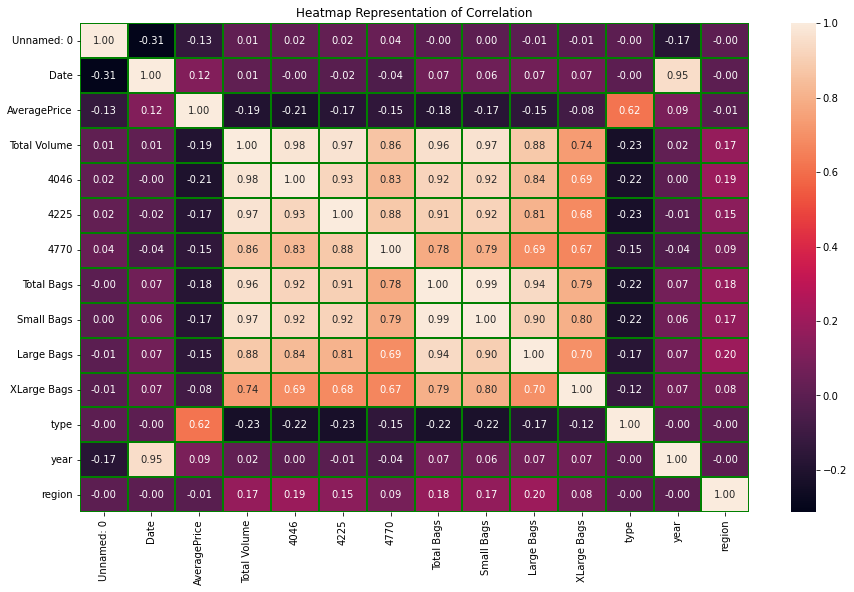

In [41]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linecolor='g',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=0)
plt.title('Heatmap Representation of Correlation')
plt.show()

###### Multicollinearity

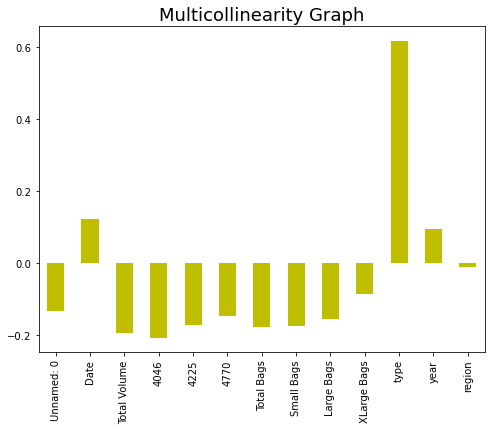

In [42]:
plt.figure(figsize=(8,6))
df.corr().AveragePrice.drop(['AveragePrice']).plot(kind='bar',color='y')
plt.title('Multicollinearity Graph',fontsize=18)
plt.show()

###### Skewnwss

In [43]:
df.skew().sort_values()

region           0.000030
Date             0.000120
type             0.000329
Unnamed: 0       0.108334
year             0.215339
AveragePrice     0.580303
4046             8.648526
4225             8.942760
Total Volume     9.007687
Small Bags       9.541906
Total Bags       9.756195
Large Bags       9.818731
4770            10.244212
XLarge Bags     13.483327
dtype: float64

###### The threshold value of Skewness is +/=0.5. Attributes- AveragePrice,4046,4225, Total Volume ,Small Bags,Total Bags,Large Bags,4770,XLarge Bags are not attaining the threshold value hence will remove skewness from thses columns lateron in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

##### Distribution Plot

The Distribution Plot for attribute-Date is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


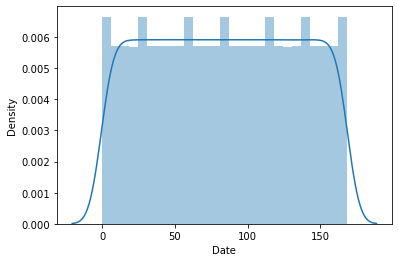



The Distribution Plot for attribute-AveragePrice is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


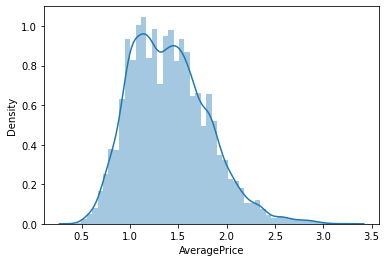



The Distribution Plot for attribute-Total Volume is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


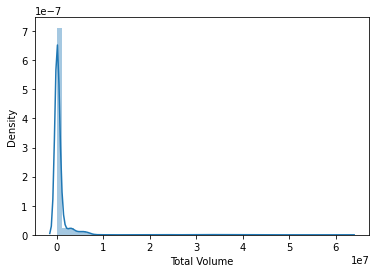



The Distribution Plot for attribute-4046 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


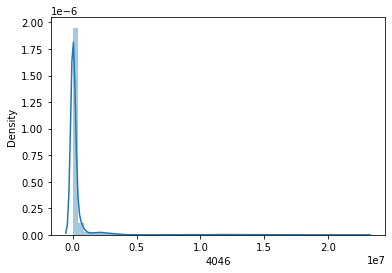



The Distribution Plot for attribute-4225 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


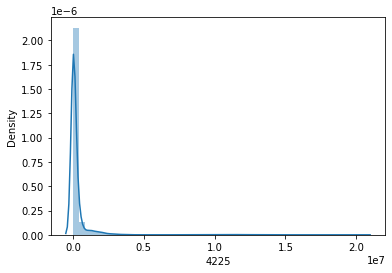



The Distribution Plot for attribute-4770 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


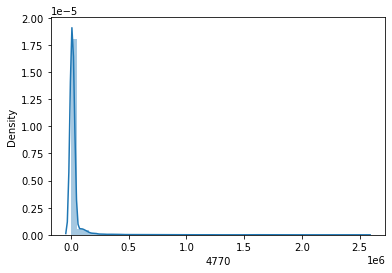



The Distribution Plot for attribute-Total Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


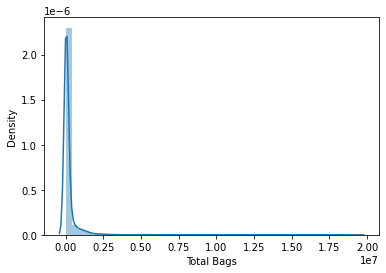



The Distribution Plot for attribute-Small Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


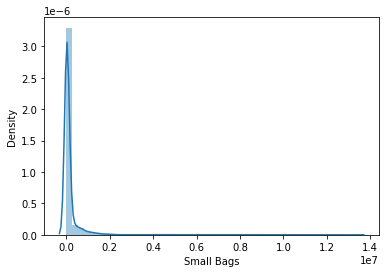



The Distribution Plot for attribute-Large Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


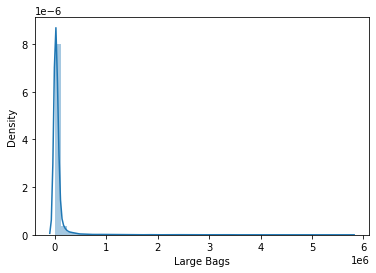



The Distribution Plot for attribute-XLarge Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


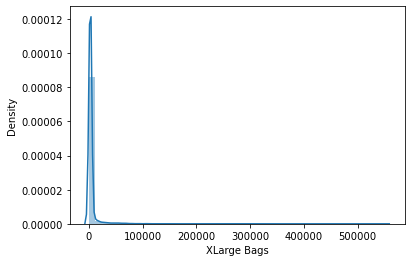



The Distribution Plot for attribute-type is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


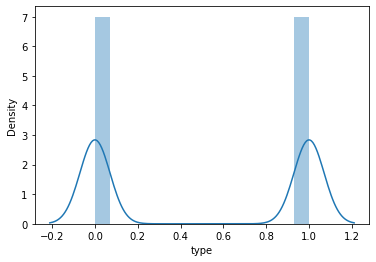



The Distribution Plot for attribute-year is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


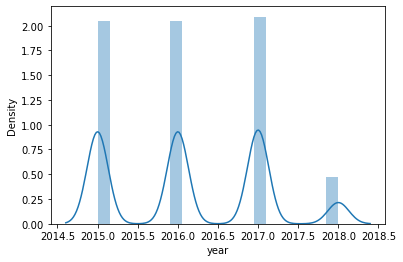



The Distribution Plot for attribute-region is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


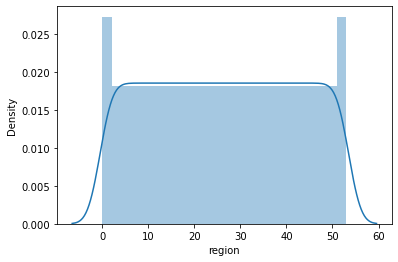

In [44]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'The Distribution Plot for attribute-{i} is given below..')
    print(sns.distplot(df[i]))
    plt.show()
    print('\n')

###### Outliers

##### Boxplots To check the Outliers

The BoxPlot Diagram for attribute-Date is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


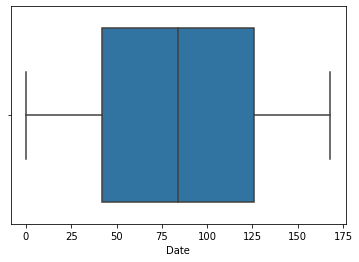



The BoxPlot Diagram for attribute-AveragePrice is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


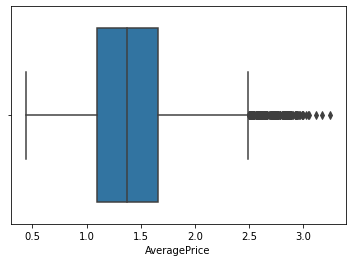



The BoxPlot Diagram for attribute-Total Volume is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


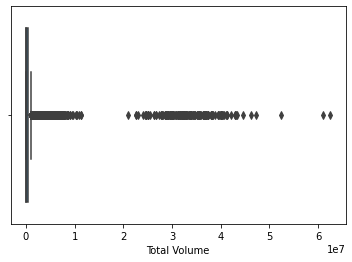



The BoxPlot Diagram for attribute-4046 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


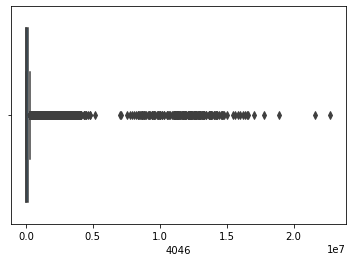



The BoxPlot Diagram for attribute-4225 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


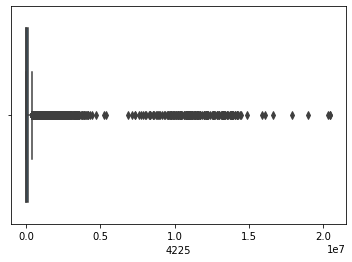



The BoxPlot Diagram for attribute-4770 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


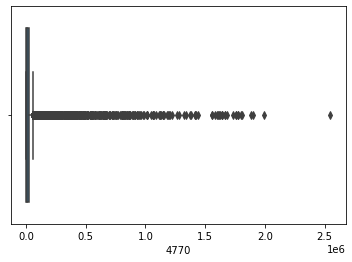



The BoxPlot Diagram for attribute-Total Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


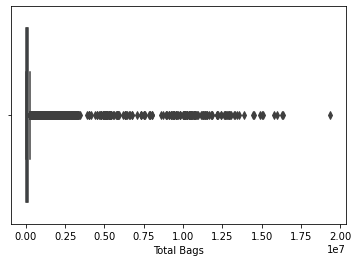



The BoxPlot Diagram for attribute-Small Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


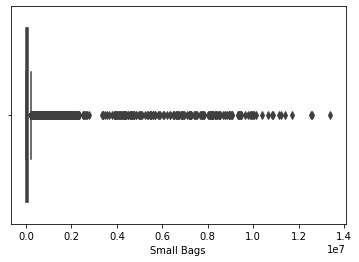



The BoxPlot Diagram for attribute-Large Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


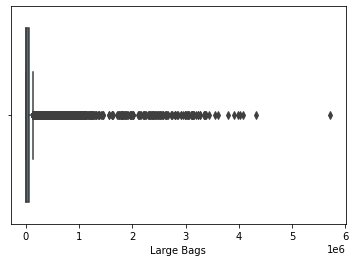



The BoxPlot Diagram for attribute-XLarge Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


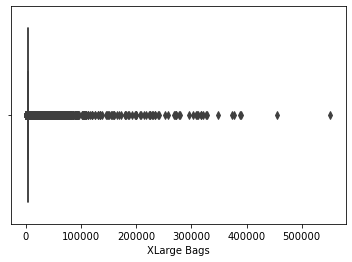



The BoxPlot Diagram for attribute-type is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


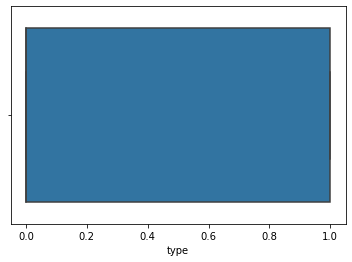



The BoxPlot Diagram for attribute-year is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


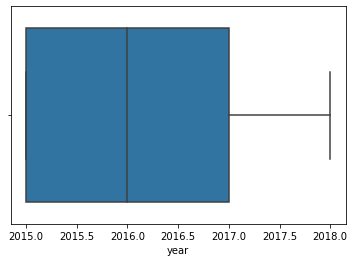



The BoxPlot Diagram for attribute-region is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


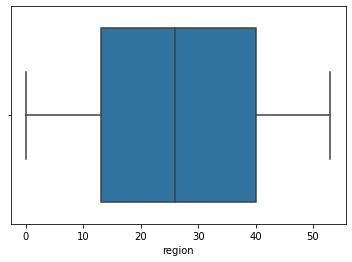

In [45]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'The BoxPlot Diagram for attribute-{i} is given below..')
    print(sns.boxplot(df[i]))
    plt.show()
    print('\n')

In [46]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([ 4,  4, 10, ...,  2,  2,  2], dtype=int64))

In [47]:
z.iloc[346]

Unnamed: 0      0.630967
Date            1.557830
AveragePrice    1.306241
Total Volume    2.234545
4046            3.197492
4225            2.580641
4770            1.528131
Total Bags      0.397450
Small Bags      0.570547
Large Bags      0.171387
XLarge Bags     0.142794
type            0.999836
year            1.221282
region          1.315226
Name: 346, dtype: float64

In [48]:
z.iloc[17428][1]

0.6969677159120611

In [49]:
z.iloc[780][9]

0.1522448473391677

###### Data Cleansing

##### Remove Negative Correlation

In [50]:
df1=df.drop(['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags'],axis=1)
df1

Unnamed: 0  Date  AveragePrice          4770  XLarge Bags  type  year  \
0               0    51          1.33     48.160000  3106.426507     0  2015   
1               1    50          1.35     58.330000  3106.426507     0  2015   
2               2    49          0.93    130.500000  3106.426507     0  2015   
3               3    22          1.08     72.580000  3106.426507     0  2015   
4               4    46          1.28     75.780000  3106.426507     0  2015   
...           ...   ...           ...           ...          ...   ...   ...   
18244           7   164          1.63  22839.735993  3106.426507     1  2018   
18245           8   159          1.71  22839.735993  3106.426507     1  2018   
18246           9   158          1.87    727.940000  3106.426507     1  2018   
18247          10   157          1.93    727.010000  3106.426507     1  2018   
18248          11   166          1.62    224.530000  3106.426507     1  2018   

       region  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
18244      53  
18245      53  
18246      53  
18247      53  
18248      53  

[18249 rows x 8 columns]

###### Remove Multicollinearity

In [51]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [52]:
x=df1.drop('AveragePrice',axis=1)
x

Unnamed: 0  Date          4770  XLarge Bags  type  year  region
0               0    51     48.160000  3106.426507     0  2015       0
1               1    50     58.330000  3106.426507     0  2015       0
2               2    49    130.500000  3106.426507     0  2015       0
3               3    22     72.580000  3106.426507     0  2015       0
4               4    46     75.780000  3106.426507     0  2015       0
...           ...   ...           ...          ...   ...   ...     ...
18244           7   164  22839.735993  3106.426507     1  2018      53
18245           8   159  22839.735993  3106.426507     1  2018      53
18246           9   158    727.940000  3106.426507     1  2018      53
18247          10   157    727.010000  3106.426507     1  2018      53
18248          11   166    224.530000  3106.426507     1  2018      53

[18249 rows x 7 columns]

In [53]:
#calculating VIF Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df2)

In [54]:
vif()

      Features        VIF
0   Unnamed: 0   3.831056
1         Date   4.476300
2         4770   1.991940
3  XLarge Bags   1.998494
4         type   2.046345
5         year  12.900434
6       region   3.924933


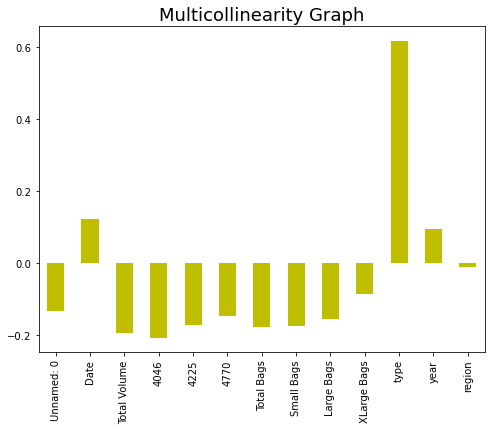

In [55]:
plt.figure(figsize=(8,6))
df.corr().AveragePrice.drop(['AveragePrice']).plot(kind='bar',color='y')
plt.title('Multicollinearity Graph',fontsize=18)
plt.show()

##### Removing Outliers

In [56]:
df3=df1[(z<3).all(axis=1)]
df3

Unnamed: 0  Date  AveragePrice          4770  XLarge Bags  type  year  \
0               0    51          1.33     48.160000  3106.426507     0  2015   
1               1    50          1.35     58.330000  3106.426507     0  2015   
2               2    49          0.93    130.500000  3106.426507     0  2015   
3               3    22          1.08     72.580000  3106.426507     0  2015   
4               4    46          1.28     75.780000  3106.426507     0  2015   
...           ...   ...           ...           ...          ...   ...   ...   
18244           7   164          1.63  22839.735993  3106.426507     1  2018   
18245           8   159          1.71  22839.735993  3106.426507     1  2018   
18246           9   158          1.87    727.940000  3106.426507     1  2018   
18247          10   157          1.93    727.010000  3106.426507     1  2018   
18248          11   166          1.62    224.530000  3106.426507     1  2018   

       region  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
18244      53  
18245      53  
18246      53  
18247      53  
18248      53  

[17665 rows x 8 columns]

In [57]:
print(df3.shape)
print(df1.shape)

(17665, 8)
(18249, 8)


In [58]:
Percentage_loss=(18249-17665)*100/18249
Percentage_loss

3.200175352074086

###### Removing Skewness

###### Power transform method

In [59]:
from sklearn.preprocessing import power_transform


In [60]:
x=df3.drop('AveragePrice',axis=1)
x

Unnamed: 0  Date          4770  XLarge Bags  type  year  region
0               0    51     48.160000  3106.426507     0  2015       0
1               1    50     58.330000  3106.426507     0  2015       0
2               2    49    130.500000  3106.426507     0  2015       0
3               3    22     72.580000  3106.426507     0  2015       0
4               4    46     75.780000  3106.426507     0  2015       0
...           ...   ...           ...          ...   ...   ...     ...
18244           7   164  22839.735993  3106.426507     1  2018      53
18245           8   159  22839.735993  3106.426507     1  2018      53
18246           9   158    727.940000  3106.426507     1  2018      53
18247          10   157    727.010000  3106.426507     1  2018      53
18248          11   166    224.530000  3106.426507     1  2018      53

[17665 rows x 7 columns]

In [61]:
x=power_transform(x)
x

array([[-1.96651496, -0.5689515 , -1.40994356, ..., -1.01822434,
         0.        , -2.01089139],
       [-1.79060706, -0.59123119, -1.37161008, ..., -1.01822434,
         0.        , -2.01089139],
       [-1.6466052 , -0.6136399 , -1.19515493, ..., -1.01822434,
         0.        , -2.01089139],
       ...,
       [-0.9271573 ,  1.39626695, -0.72446471, ...,  0.98210184,
         0.        ,  1.57822121],
       [-0.84384039,  1.38026604, -0.72486879, ...,  0.98210184,
         0.        ,  1.57822121],
       [-0.76334949,  1.52322809, -1.06131478, ...,  0.98210184,
         0.        ,  1.57822121]])

In [62]:
df3.skew().sort_values()

type           -0.036126
region          0.013290
Date            0.013470
Unnamed: 0      0.105960
year            0.229600
AveragePrice    0.378326
4770            4.843557
XLarge Bags     6.279517
dtype: float64

###### Boxcox Method

In [63]:
l=['4770','XLarge Bags']
for i in l:
    df3[i]=scipy.stats.boxcox(df3[i])[0]


In [64]:
df3.skew().sort_values()

4770           -0.177274
type           -0.036126
region          0.013290
Date            0.013470
Unnamed: 0      0.105960
year            0.229600
XLarge Bags     0.313396
AveragePrice    0.378326
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


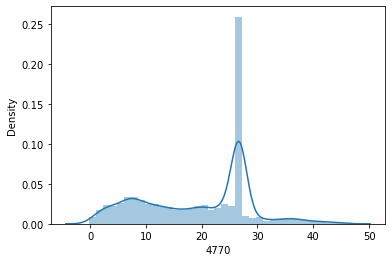

In [65]:
print(sns.distplot(df3['4770']))

AxesSubplot(0.125,0.125;0.775x0.755)


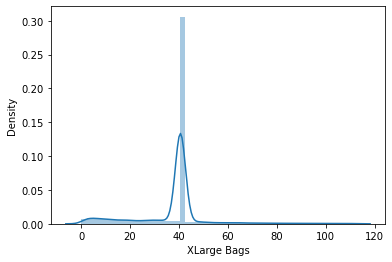

In [66]:
print(sns.distplot(df3['XLarge Bags']))

###### Using statndard Scaller

In [67]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-1.96651496, -0.5689515 , -1.40994356, ..., -1.01822434,
         0.        , -2.01089139],
       [-1.79060706, -0.59123119, -1.37161008, ..., -1.01822434,
         0.        , -2.01089139],
       [-1.6466052 , -0.6136399 , -1.19515493, ..., -1.01822434,
         0.        , -2.01089139],
       ...,
       [-0.9271573 ,  1.39626695, -0.72446471, ...,  0.98210184,
         0.        ,  1.57822121],
       [-0.84384039,  1.38026604, -0.72486879, ...,  0.98210184,
         0.        ,  1.57822121],
       [-0.76334949,  1.52322809, -1.06131478, ...,  0.98210184,
         0.        ,  1.57822121]])

In [68]:
x.shape

(17665, 7)

In [69]:
x.mean

<function ndarray.mean>

In [70]:
x.std()

0.9258200997725514

<AxesSubplot:ylabel='Density'>

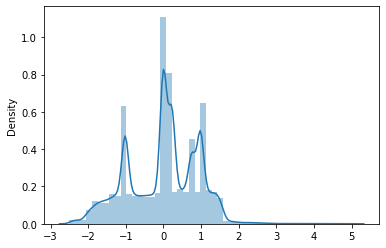

In [71]:
sns.distplot(x)

In [72]:
y=df3['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17665, dtype: float64

###### Training_Testing Phase

In [73]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()

In [74]:
#will finding best value of random_state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.46698836451168857
Testing Accuracy is -0.39402847146051023

The Mean Absolute Error is (MAE)- 0.22618483560530125
The Mean Squared Error is (MSE)- 0.08474215755348671
The Root Mean Squared Error is (RMSE)- 0.29110506274107756


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.4342555079187882
Testing Accuracy is -0.44582845788253334

The Mean Absolute Error is (MAE)- 0.23157033737047117
The Mean Squared Error is (MSE)- 0.08821736785266115
The Root Mean Squared Error is (RMSE)- 0.2970140869599642


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.44734234685038565
Testing Accuracy is -0.4133370049827514

The Mean Absolute Error is (MAE)- 0.22889548678126548
The Mean Squared Error is (MSE)- 0.08660890600406715
The Root Mean Squared Error is (RMSE)- 0.29429391091911355


At Random_

In [75]:
#Traing the Linear Regression Model at Random_State 33
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
print('\nError in the model is calculated below-\n')
print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')

Training Accuracy is -0.40772632542900844
Testing Accuracy is -0.42646783564970825

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2326871630636228
The Mean Squared Error is (MSE)- 0.08919087883643219
The Root Mean Squared Error is (RMSE)- 0.2986484201137387


###### Draw the linear regression

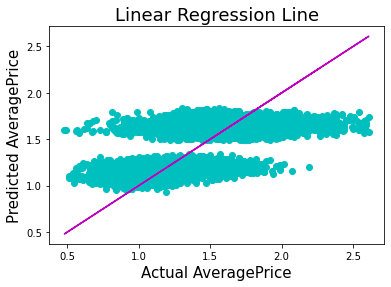

In [77]:
plt.scatter(y_test,test_pred,color='c')
plt.plot(y_test,y_test,color='m')
plt.xlabel("Actual AveragePrice",fontsize=15)
plt.ylabel("Predicted AveragePrice",fontsize=15)
plt.title("Linear Regression Line",fontsize=18)
plt.show()

###### Find out the CV Score

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
for n in range(2,12):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score Linear Regression Model is -169.58780532120855 and Standard Deviation is 1.5475060032597503


At K-Fold 3 The CV Score Linear Regression Model is -2.803196264965757 and Standard Deviation is 0.18546713170668738


At K-Fold 4 The CV Score Linear Regression Model is -7.1070259152241215 and Standard Deviation is 0.09467237798316012


At K-Fold 5 The CV Score Linear Regression Model is 3.265279104028087 and Standard Deviation is 0.16160541431083356


At K-Fold 6 The CV Score Linear Regression Model is -6.451876438299271 and Standard Deviation is 0.13845838294952414


At K-Fold 7 The CV Score Linear Regression Model is -1.4097358173459331 and Standard Deviation is 0.17748357224925135


At K-Fold 8 The CV Score Linear Regression Model is -3.0164791145894836 and Standard Deviation is 0.12126159177490697


At K-Fold 9 The CV Score Linear Regression Model is -1.3222263172964883 and Standard Deviation is 0.16893122576066744


At K-Fold 10 The CV Score Linear Regression M

In [80]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
sgd=SGDRegressor()
en=ElasticNet()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [81]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,12):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')

In [82]:
model(lr,x,y)

Training Accuracy of model LinearRegression() is -0.40772632542900844
Testing Accuracy of model LinearRegression() is -0.42646783564970825

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2326871630636228
The Mean Squared Error is (MSE)- 0.08919087883643219
The Root Mean Squared Error is (RMSE)- 0.2986484201137387


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is -169.58780532120855 & std is 1.5475060032597503


At K-Fold 3 the CV Score of model LinearRegression() is -2.803196264965757 & std is 0.18546713170668738


At K-Fold 4 the CV Score of model LinearRegression() is -7.1070259152241215 & std is 0.09467237798316012


At K-Fold 5 the CV Score of model LinearRegression() is 3.265279104028087 & std is 0.16160541431083356


At K-Fold 6 the CV Score of model LinearRegression() is -6.451876438299271 & std is 0.13845838294952414


At K-Fold 7 the CV Score of model LinearRegression() is -1.4097358173459331 & std is 0

In [83]:
model(sgd,x,y)

Training Accuracy of model SGDRegressor() is -0.42652744707212453
Testing Accuracy of model SGDRegressor() is -0.44356501368568924

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2325336308024041
The Mean Squared Error is (MSE)- 0.08929592903383123
The Root Mean Squared Error is (RMSE)- 0.2988242443876186


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is -868.1999964073715 & std is 8.622929406068831


At K-Fold 3 the CV Score of model SGDRegressor() is -3.2553657320827933 & std is 0.17559351884337376


At K-Fold 4 the CV Score of model SGDRegressor() is -6.72622105362404 & std is 0.09641364931135286


At K-Fold 5 the CV Score of model SGDRegressor() is 2.490809086655874 & std is 0.16392550745943596


At K-Fold 6 the CV Score of model SGDRegressor() is -7.797816947475862 & std is 0.13810495200740208


At K-Fold 7 the CV Score of model SGDRegressor() is -1.1503755736033778 & std is 0.17942475057663027


At K-Fold 8 th

In [84]:
model(en,x,y)

Training Accuracy of model ElasticNet() is -3.02829842107693e+30
Testing Accuracy of model ElasticNet() is -2.9950692506308864e+30

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.3123333303832333
The Mean Squared Error is (MSE)- 0.14766831501576866
The Root Mean Squared Error is (RMSE)- 0.3842763524024978


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is -234.24243913063867 & std is 0.49807736330592434


At K-Fold 3 the CV Score of model ElasticNet() is -133.90733297094508 & std is 1.3134544687281795


At K-Fold 4 the CV Score of model ElasticNet() is -144.80125910010253 & std is 1.2846260443348165


At K-Fold 5 the CV Score of model ElasticNet() is -115.85337890670257 & std is 1.3679441689031349


At K-Fold 6 the CV Score of model ElasticNet() is -133.05085900453955 & std is 1.3739996551329134


At K-Fold 7 the CV Score of model ElasticNet() is -127.43617720285536 & std is 1.6208120327543845


At K-Fold 8 the CV Scor

In [85]:
model(rf,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9698768994692825
Testing Accuracy of model RandomForestRegressor() is 0.7251257733377954

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.12326728301886793
The Mean Squared Error is (MSE)- 0.0299635794490566
The Root Mean Squared Error is (RMSE)- 0.1730999117534628


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is -227.14456603552748 & std is 0.942477553792052


At K-Fold 3 the CV Score of model RandomForestRegressor() is -9.567978610215961 & std is 0.4501272784930965


At K-Fold 4 the CV Score of model RandomForestRegressor() is -40.935142774306385 & std is 0.4885817348374457


At K-Fold 5 the CV Score of model RandomForestRegressor() is 9.403962661307704 & std is 0.24412252379799929


At K-Fold 6 the CV Score of model RandomForestRegressor() is 1.3012933747102404 & std is 0.21799387050964525


At K-Fold 7 the CV Score of model RandomForestRegressor() 

In [86]:
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.2760527376660902
Testing Accuracy of model AdaBoostRegressor() is -0.3042852557423039

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2193925900075239
The Mean Squared Error is (MSE)- 0.07798606248837239
The Root Mean Squared Error is (RMSE)- 0.27925984761217


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -181.5758176839573 & std is 0.8764119444197553


At K-Fold 3 the CV Score of model AdaBoostRegressor() is -9.645281469641983 & std is 0.4461493435718395


At K-Fold 4 the CV Score of model AdaBoostRegressor() is -3.747726203193408 & std is 0.15502894384125251


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 1.2843222966830226 & std is 0.2850608240985476


At K-Fold 6 the CV Score of model AdaBoostRegressor() is -2.4535865250693565 & std is 0.3093413232868619


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 3.15626014866058 & std is 0.2

In [87]:
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.39410234000146993
Testing Accuracy of model GradientBoostingRegressor() is 0.343381473043601

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.171653398695984
The Mean Squared Error is (MSE)- 0.05169585560891647
The Root Mean Squared Error is (RMSE)- 0.22736722632982193


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is -190.11803687167262 & std is 1.298876971301492


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 15.809029814293849 & std is 0.32531382945019754


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 26.361778342221637 & std is 0.10609576365345723


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is 29.611948935066902 & std is 0.18672973685939628


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is 22.427628016103082 & std is 0.24270719848440717


At K-Fold 7 the CV Score of 

In [88]:
model(ls,x,y)

Training Accuracy of model Lasso() is -3.02829842107693e+30
Testing Accuracy of model Lasso() is -2.9950692506308864e+30

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.3123333303832333
The Mean Squared Error is (MSE)- 0.14766831501576866
The Root Mean Squared Error is (RMSE)- 0.3842763524024978


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is -234.24243913063867 & std is 0.49807736330592434


At K-Fold 3 the CV Score of model Lasso() is -133.90733297094508 & std is 1.3134544687281795


At K-Fold 4 the CV Score of model Lasso() is -144.80125910010253 & std is 1.2846260443348165


At K-Fold 5 the CV Score of model Lasso() is -115.85337890670257 & std is 1.3679441689031349


At K-Fold 6 the CV Score of model Lasso() is -133.05085900453955 & std is 1.3739996551329134


At K-Fold 7 the CV Score of model Lasso() is -127.43617720285536 & std is 1.6208120327543845


At K-Fold 8 the CV Score of model Lasso() is -124.0214249239852

##### Hyper Parameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive']}

In [91]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def Hyper_Parameter_Tuning(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [92]:
Hyper_Parameter_Tuning(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 0.0001, 'selection': 'random'}


In [93]:
Hyper_Parameter_Tuning(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 1, 'solver': 'sag'}


In [94]:
Hyper_Parameter_Tuning(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.0001, 'selection': 'random'}


In [95]:
Hyper_Parameter_Tuning(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [96]:
Hyper_Parameter_Tuning(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'squared_error', 'loss': 'squared_error', 'max_features': 'auto'}


In [97]:
Hyper_Parameter_Tuning(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.01, 'learning_rate': 'optimal', 'penalty': 'l2'}


In [98]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.001,selection='random')
rd=Ridge(alpha=10,solver='lsqr')
en=ElasticNet(alpha=0.001,selection='cyclic')
rf=RandomForestRegressor(criterion='absolute_error',max_features=None)
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',max_features='auto')
sgd=SGDRegressor(alpha=0.0001,learning_rate='optimal',penalty='l1')

In [99]:
model(lr,x,y)

Training Accuracy of model LinearRegression() is -0.40772632542900844
Testing Accuracy of model LinearRegression() is -0.42646783564970825

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2326871630636228
The Mean Squared Error is (MSE)- 0.08919087883643219
The Root Mean Squared Error is (RMSE)- 0.2986484201137387


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is -169.58780532120855 & std is 1.5475060032597503


At K-Fold 3 the CV Score of model LinearRegression() is -2.803196264965757 & std is 0.18546713170668738


At K-Fold 4 the CV Score of model LinearRegression() is -7.1070259152241215 & std is 0.09467237798316012


At K-Fold 5 the CV Score of model LinearRegression() is 3.265279104028087 & std is 0.16160541431083356


At K-Fold 6 the CV Score of model LinearRegression() is -6.451876438299271 & std is 0.13845838294952414


At K-Fold 7 the CV Score of model LinearRegression() is -1.4097358173459331 & std is 0

In [100]:
model(ls,x,y)

Training Accuracy of model Lasso(alpha=0.001, selection='random') is -0.42461830024766756
Testing Accuracy of model Lasso(alpha=0.001, selection='random') is -0.4438145221928389

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2327578133843388
The Mean Squared Error is (MSE)- 0.08919573522687325
The Root Mean Squared Error is (RMSE)- 0.2986565506177175


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.001, selection='random') is -154.49770553117958 & std is 1.4541358106386164


At K-Fold 3 the CV Score of model Lasso(alpha=0.001, selection='random') is -2.6466669629911177 & std is 0.1862270869461814


At K-Fold 4 the CV Score of model Lasso(alpha=0.001, selection='random') is -7.532178594995512 & std is 0.10258448972835103


At K-Fold 5 the CV Score of model Lasso(alpha=0.001, selection='random') is 2.9599692890122964 & std is 0.16544553284631466


At K-Fold 6 the CV Score of model Lasso(alpha=0.001, selection='random') 

In [101]:
model(rd,x,y)

Training Accuracy of model Ridge(alpha=10, solver='lsqr') is -0.4099437004995172
Testing Accuracy of model Ridge(alpha=10, solver='lsqr') is -0.4286915509284912

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.23268630743654603
The Mean Squared Error is (MSE)- 0.08918790423283497
The Root Mean Squared Error is (RMSE)- 0.2986434399628342


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='lsqr') is -161.64445436767306 & std is 1.4887209282252574


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='lsqr') is -2.827366604024943 & std is 0.18570984867846468


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='lsqr') is -7.133841434730062 & std is 0.09575978063029036


At K-Fold 5 the CV Score of model Ridge(alpha=10, solver='lsqr') is 3.238469032508504 & std is 0.16184952555629925


At K-Fold 6 the CV Score of model Ridge(alpha=10, solver='lsqr') is -6.4723572385250785 & std is 0.13926932665558214


At 

In [102]:
model(en,x,y)

Training Accuracy of model ElasticNet(alpha=0.001) is -0.41750247082178626
Testing Accuracy of model ElasticNet(alpha=0.001) is -0.43645242759291425

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2327171646827023
The Mean Squared Error is (MSE)- 0.08918996808714769
The Root Mean Squared Error is (RMSE)- 0.2986468953248094


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.001) is -158.06946029864866 & std is 1.4709464480936


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.001) is -2.697352919915974 & std is 0.18549947625379296


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.001) is -7.334405401828042 & std is 0.09922558865875636


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.001) is 3.1021565674776252 & std is 0.16365545900810202


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.001) is -6.577830156362924 & std is 0.14088293505915217


At K-Fold 7 the CV Score of model ElasticNet(alpha=0.0

###### While doing all the model building and models comparision i must say that Random Forest Regressor method has performed really well as compare to other models.It gives the training accuracy of 97% and the testing accuracy of 79% which is really good performance acheive by model though there were lots of rows present.Also, the RMSE error is 0.15 which is minimum unlike others.The CV score of the model is 19% which tells us that we have not able to generalize the model but still testing accuracy is acheived as 79%.
GradientBoosting Regressor is the second top model after RandomForestRegressor having training accuracy as 42%,testing accuracy as 38%,CV score as 39% and RMSE is- 0.2. Here testing score and Cv score are same.

###### Saving the best model

In [103]:
import joblib

In [104]:
file='Avacd.obj'
joblib.dump(rf,file)

['Avacd.obj']

In [105]:
b=joblib.load('Avacd.obj')
b

RandomForestRegressor(criterion='absolute_error', max_features=None)

In [106]:
file='Avacado.obj'
joblib.dump(grd,file)


['Avacado.obj']

In [107]:
a=joblib.load('Avacado.obj')
a

GradientBoostingRegressor(max_features='auto')

In [110]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([ 4,  4, 10, ...,  2,  2,  2], dtype=int64))

In [111]:
z1.iloc[346][3]

2.234544829955079

In [112]:
df1=df[(z1<3).all(axis=1)]
df1

Unnamed: 0  Date  AveragePrice  Total Volume     4046       4225  \
0               0    51          1.33      64236.62  1036.74   54454.85   
1               1    50          1.35      54876.98   674.28   44638.81   
2               2    49          0.93     118220.22   794.70  109149.67   
3               3    22          1.08      78992.15  1132.00   71976.41   
4               4    46          1.28      51039.60   941.48   43838.39   
...           ...   ...           ...           ...      ...        ...   
18244           7   164          1.63      17074.83  2046.96    1529.20   
18245           8   159          1.71      13888.04  1191.70    3431.50   
18246           9   158          1.87      13766.76  1191.92    2452.79   
18247          10   157          1.93      16205.22  1527.63    2981.04   
18248          11   166          1.62      17489.58  2894.77    2356.13   

               4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
0         48.160000     8696.87     8603.62       93.25  3106.426507     0   
1         58.330000     9505.56     9408.07       97.49  3106.426507     0   
2        130.500000     8145.35     8042.21      103.14  3106.426507     0   
3         72.580000     5811.16     5677.40      133.76  3106.426507     0   
4         75.780000     6183.95     5986.26      197.69  3106.426507     0   
...             ...         ...         ...         ...          ...   ...   
18244  22839.735993    13498.67    13066.82      431.85  3106.426507     1   
18245  22839.735993     9264.84     8940.04      324.80  3106.426507     1   
18246    727.940000     9394.11     9351.80       42.31  3106.426507     1   
18247    727.010000    10969.54    10919.54       50.00  3106.426507     1   
18248    224.530000    12014.15    11988.14       26.01  3106.426507     1   

       year  region  
0      2015       0  
1      2015       0  
2      2015       0  
3      2015       0  
4      2015       0  
...     ...     ...  
18244  2018      53  
18245  2018      53  
18246  2018      53  
18247  2018      53  
18248  2018      53  

[17665 rows x 14 columns]

In [113]:
percentage_loss=(18249-17665)*100/18249
percentage_loss

3.200175352074086

In [114]:
df1.skew().sort_values()

type           -0.036126
region          0.013290
Date            0.013470
Unnamed: 0      0.105960
year            0.229600
AveragePrice    0.378326
Total Volume    3.752409
Total Bags      4.048569
Small Bags      4.198751
4225            4.428792
4770            4.843557
4046            4.860146
Large Bags      4.879193
XLarge Bags     6.279517
dtype: float64

In [115]:
l=['Total Volume','Total Bags','Small Bags','4225','4770','4046','Large Bags','XLarge Bags']
for i in l:
    df1[i]=scipy.stats.boxcox(df1[i])[0]

In [116]:
df1.skew().sort_values()

4770           -0.177274
Large Bags     -0.100641
4225           -0.045629
4046           -0.038278
type           -0.036126
Small Bags     -0.033599
Total Bags     -0.023929
Total Volume   -0.008477
region          0.013290
Date            0.013470
Unnamed: 0      0.105960
year            0.229600
XLarge Bags     0.313396
AveragePrice    0.378326
dtype: float64

In [117]:
#feature
x=df1.drop('region',axis=1)
x


Unnamed: 0  Date  AveragePrice  Total Volume      4046       4225  \
0               0    51          1.33     11.843666  8.267135  17.689295   
1               1    50          1.35     11.663855  7.669475  17.204223   
2               2    49          0.93     12.543375  7.896281  19.450240   
3               3    22          1.08     12.080283  8.390814  18.383648   
4               4    46          1.28     11.581197  8.132137  17.160462   
...           ...   ...           ...           ...       ...        ...   
18244           7   164          1.63     10.341408  9.238251  10.076785   
18245           8   159          1.71     10.109346  8.463371  11.607995   
18246           9   158          1.87     10.099505  8.463632  10.959457   
18247          10   157          1.93     10.282633  8.816540  11.333996   
18248          11   166          1.62     10.368406  9.745513  10.882999   

            4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  
0       5.496314   12.263084   13.425036    6.123500    40.590399     0  2015  
1       5.874206   12.421629   13.613250    6.202601    40.590399     0  2015  
2       7.605172   12.146830   13.283856    6.303460    40.590399     0  2015  
3       6.320723   11.555270   12.567588    6.778277    40.590399     0  2015  
4       6.410853   11.663248   12.675243    7.521793    40.590399     0  2015  
...          ...         ...         ...         ...          ...   ...   ...  
18244  26.698749   13.055798   14.316919    9.123776    40.590399     1  2018  
18245  26.698749   12.375799   13.505634    8.521335    40.590399     1  2018  
18246  12.203254   12.400547   13.600575    4.789379    40.590399     1  2018  
18247  12.199307   12.678945   13.930038    5.060313    40.590399     1  2018  
18248   8.913591   12.843562   14.130534    4.031861    40.590399     1  2018  

[17665 rows x 13 columns]

In [118]:
#Target
y=df1.region
y


0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17665, dtype: int32

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [120]:
x=sc.fit_transform(x)
x

array([[-1.56430215, -0.66604817, -0.19470912, ...,  0.22107884,
        -1.01822434, -1.21031372],
       [-1.49979978, -0.68652995, -0.14286397, ...,  0.22107884,
        -1.01822434, -1.21031372],
       [-1.43529741, -0.70701174, -1.23161201, ...,  0.22107884,
        -1.01822434, -1.21031372],
       ...,
       [-0.98378079,  1.52550282,  1.2051098 , ...,  0.22107884,
         0.98210184,  1.98028349],
       [-0.91927841,  1.50502103,  1.36064523, ...,  0.22107884,
         0.98210184,  1.98028349],
       [-0.85477604,  1.6893571 ,  0.55704549, ...,  0.22107884,
         0.98210184,  1.98028349]])

In [121]:
x.mean()

3.275281928046383e-15

In [122]:
x.std()

1.0

<AxesSubplot:ylabel='Density'>

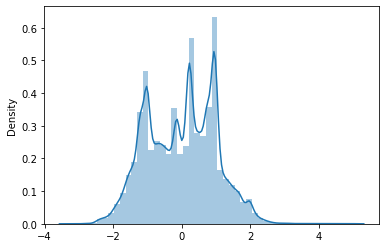

In [123]:
sns.distplot(x)

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca=PCA(n_components=4)

In [126]:
x_pca=pca.fit_transform(x)
x_pca

array([[-0.5318809 , -0.68888683, -1.44724295, -1.46801038],
       [-0.61851175, -0.6996359 , -1.4142858 , -1.42236389],
       [-0.05480997, -0.97478205, -1.37200312, -1.37324702],
       ...,
       [-2.09352509,  2.95922038, -0.25987457, -0.09376818],
       [-1.99659401,  2.95625201, -0.23131547, -0.04760553],
       [-1.72140267,  2.96305446, -0.49599174,  0.17152601]])

In [127]:
x=x_pca
x

array([[-0.5318809 , -0.68888683, -1.44724295, -1.46801038],
       [-0.61851175, -0.6996359 , -1.4142858 , -1.42236389],
       [-0.05480997, -0.97478205, -1.37200312, -1.37324702],
       ...,
       [-2.09352509,  2.95922038, -0.25987457, -0.09376818],
       [-1.99659401,  2.95625201, -0.23131547, -0.04760553],
       [-1.72140267,  2.96305446, -0.49599174,  0.17152601]])

In [128]:
x.shape

(17665, 4)

In [129]:
y.shape

(17665,)

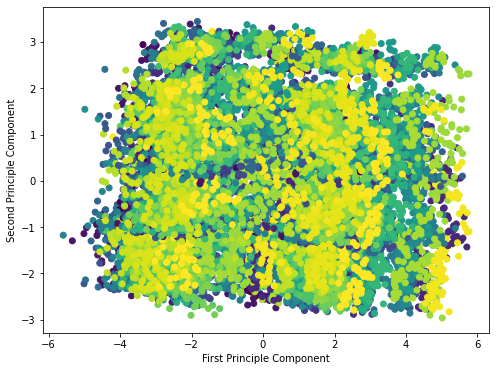

In [130]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1],c=y)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

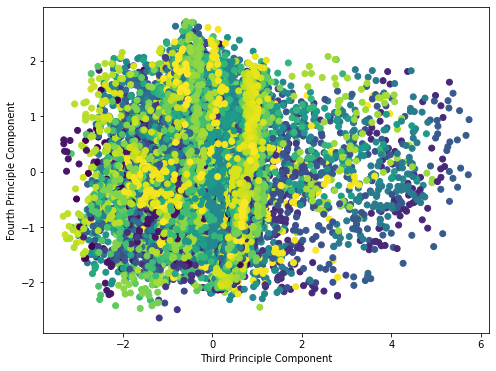

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,2:3],x[:,3],c=y)
plt.xlabel('Third Principle Component')
plt.ylabel('Fourth Principle Component')
plt.show()

In [132]:
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
22    334
25    333
48    333
21    333
53    332
7     332
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    308
42    301
45    294
6     293
15    276
52    257
51    169
Name: region, dtype: int64

In [133]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [135]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [136]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

In [137]:
print(x.shape)
print(y.shape)

(18252, 4)
(18252,)


In [138]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [139]:
#will finding best value of random_state
for h in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.6063968221354702
Testing Accuracy Score is-  0.39139961654341276


At random_state 1
Training Accuracy Score is-  0.6035203068282994
Testing Accuracy Score is-  0.39742536291427005


At random_state 2
Training Accuracy Score is-  0.6041367029655503
Testing Accuracy Score is-  0.39742536291427005


At random_state 3
Training Accuracy Score is-  0.601945072255325
Testing Accuracy Score is-  0.406463982470556


At random_state 4
Training Accuracy Score is-  0.6016711184165469
Testing Accuracy Score is-  0.3883867433579841


At random_state 5
Training Accuracy Score is-  0.5981782069721252
Testing Accuracy Score is-  0.4018077239112572


At random_state 6
Training Accuracy Score is-  0.6036572837476886
Testing Accuracy Score is-  0.39331689947959464


At random_state 7
Training Accuracy Score is-  0.6027669337716595
Testing Accuracy Score is-  0.38783894823336074


At random_state 8
Training Accuracy Score is-  0.6029723991507431
Testing Acc

In [140]:
#Traing the Logistic Regression Model at Random_State 86
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=86)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',86)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 86
Training Accuracy Score is-  0.5988630915690706
Testing Accuracy Score is-  0.4061900849082443




In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
for i in range(2,21):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.0695266272189349
At K-Fold 3 the CV Score of model is 0.10535831689677844
At K-Fold 4 the CV Score of model is 0.11209730440499673
At K-Fold 5 the CV Score of model is 0.1276017904646128
At K-Fold 6 the CV Score of model is 0.12475345167652858
At K-Fold 7 the CV Score of model is 0.15143257702665952
At K-Fold 8 the CV Score of model is 0.15132221518231043
At K-Fold 9 the CV Score of model is 0.1507779969318431
At K-Fold 10 the CV Score of model is 0.16074677789614247
At K-Fold 11 the CV Score of model is 0.17257803200307392
At K-Fold 12 the CV Score of model is 0.17921323690554458
At K-Fold 13 the CV Score of model is 0.16737891737891739
At K-Fold 14 the CV Score of model is 0.18381341043355084
At K-Fold 15 the CV Score of model is 0.19230451462468828
At K-Fold 16 the CV Score of model is 0.19378276980795547
At K-Fold 17 the CV Score of model is 0.21448515157649747
At K-Fold 18 the CV Score of model is 0.20715538023230332
At K-Fold 19 the CV Score

In [143]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
svc=SVC()
sgd=SGDClassifier()

In [144]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,12):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

In [145]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.3648315529991783
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.08629191321499013


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.13795748411133027


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.1467784352399737


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.1542300214240422


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.15138067061143984


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.17581541571989656


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.1778971563666012


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.17280298049528817


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.17926633557892843


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.18940275321242225




In [146]:
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.05390041777960414
Testing_Accuracy_Score= 0.05149274171459874
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.009423624808240192


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.035064650449265836


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.03780407626561473


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.05133977930610116


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.05692526846372999


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.05407710801533121


At the K-Fold 8 the CV score of model AdaBoostClassifier() is 0.05583112178069723


At the K-Fold 9 the CV score of model AdaBoostClassifier() is 0.05708963401271093


At the K-Fold 10 the CV score of model AdaBoostClassifier() is 0.05572395684856487


At the K-Fold 11 the CV score of model AdaBoostClassifier() is 0.064105212564874




In [147]:
model(sgd,x,y)

For SGDClassifier()
Training_Accuracy_Score= 0.029039106910485585
Testing_Accuracy_Score= 0.027937551355792935
At the K-Fold 2 the CV score of model SGDClassifier() is 0.014464168310322156


At the K-Fold 3 the CV score of model SGDClassifier() is 0.02438088976550515


At the K-Fold 4 the CV score of model SGDClassifier() is 0.026901161516546132


At the K-Fold 5 the CV score of model SGDClassifier() is 0.02092915057987491


At the K-Fold 6 the CV score of model SGDClassifier() is 0.032215647600262985


At the K-Fold 7 the CV score of model SGDClassifier() is 0.02564101755974863


At the K-Fold 8 the CV score of model SGDClassifier() is 0.022957386035077715


At the K-Fold 9 the CV score of model SGDClassifier() is 0.023449484987946526


At the K-Fold 10 the CV score of model SGDClassifier() is 0.02498267040765803


At the K-Fold 11 the CV score of model SGDClassifier() is 0.03204928872154738




In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
#defining all the parameters of the respective models
dict_SGD={'loss':['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge','perceptron', 'squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant','adaptive','invscaling','optimal']}
dict_SVC={'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
dict_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None]}
dict_ad={'algorithm':['SAMME', 'SAMME.R']}
dict_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse']}

In [151]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [152]:
HPT(sgd,dict_SGD)

The best Parameters of the model SGDClassifier() is {'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}


In [153]:
HPT(dtc,dict_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [154]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


After applying the best parameters on each models i must say that RandomForestClassifier model performs really well in predicting the region.Though region was having 53 classes but still model gives us training accuracy score as 100% and testing accuracy score as 61%. Also the CV score which is 39%, is getting increased everytime when i'm increasing the fold numbers.Hence i'll consider this model as best one for predicting the region.

#### Saving the best Model

In [158]:
import joblib

In [159]:
file='Evl2.obj'
joblib.dump(rfc,file)

['Evl2.obj']

###### Loading the Model

In [160]:
p=joblib.load('Evl2.obj')
p

RandomForestClassifier()

###### Predicting the model

In [168]:
predi= (x_test)
predi

array([[-1.49072013,  1.51844816, -0.56086811,  0.45220867],
       [ 1.03481727, -2.01665189, -0.31222248, -0.73694613],
       [ 0.40994797, -0.7521866 , -0.37974515,  1.63272038],
       ...,
       [ 1.801849  , -1.56790112,  0.00747869, -1.27719809],
       [ 3.34343711,  0.52933758, -1.39557161,  0.94018324],
       [-0.26244644, -1.25637212, -0.85020104, -0.25961614]])

In [173]:
#Testing Accuracy score of the model
Accuracy_score= (y_test)
Accuracy_score

15091    16
487       9
12133    12
17604    48
462       8
         ..
11704     4
17792    17
2117     41
5974     11
2532     49
Name: region, Length: 3651, dtype: int32

Conclusion

In [174]:
conclusion=pd.DataFrame(data=([y_test]),index=['Predicted Attrition','Original Attrition'])
conclusion

15091  487    12133  17604  462    10969  9539   2451   \
Predicted Attrition     16      9     12     48      8     44     16     47   
Original Attrition      16      9     12     48      8     44     16     47   

                     5674   13258  ...  17898  6482   710    10937  3792   \
Predicted Attrition      5     34  ...     43     21     13     43     21   
Original Attrition       5     34  ...     43     21     13     43     21   

                     11704  17792  2117   5974   2532   
Predicted Attrition      4     17     41     11     49  
Original Attrition       4     17     41     11     49  

[2 rows x 3651 columns]

###### As testing accuracy of the model is approx 93% that's why model is predicting the region classes extrmely well.